# 데이터 로드

In [438]:
# !pip install adjustText

In [439]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText

matplotlib.rcParams['font.family']='Malgun Gothic' # 한글 폰트 세팅
matplotlib.rcParams['font.size']= 16    # 폰트 크기를 셋팅
matplotlib.rcParams['axes.unicode_minus']=False # 유니코드가 -(마이너스) 기호로 설정되는 폰트


# 브랜드별 색상 팔레트 지정
colors = {'biobidet':'firebrick', 'brondell': 'coral', 'tushy':'gold', 'toto': 'lightgreen', 'ovedecors':'seagreen', 'alphabidet':'skyblue', 'kohler': 'royalblue', 'bidetmate':'mediumpurple', 'a_s': 'indigo', 'vovo':'black'}
# 채널별 색상 팔레트 지정
channel = {'costco':'black', 'amazon': 'darkgrey', 'build.com':'darkgoldenrod', 'walmart': 'gold', 'hd':'yellow', 'lowes':'orange'}

In [440]:
import os
import pandas as pd

file_path = '../01-1. Raw Data (Bidet)/별점/' # 파일 경로
file_extension = '.xlsx' # 파일 확장자

file_list = [f for f in os.listdir(file_path) if f.endswith(file_extension)]

In [441]:
data_frames = []
for file_name in file_list:
    channel = file_name.split('_')[0]
    df = pd.read_excel(file_path + file_name)
    df['채널명'] = channel
    df.rename(columns={'고유 제품명':'제품명'}, inplace=True)
    data_frames.append(df)

In [442]:
combined_ratings_origin = pd.concat(data_frames, ignore_index=True)
combined_ratings_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31395 entries, 0 to 31394
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회사명     31395 non-null  object        
 1   제품명     31395 non-null  object        
 2   형태      31395 non-null  object        
 3   작성일     31395 non-null  datetime64[ns]
 4   별점      31395 non-null  int64         
 5   채널명     31395 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [443]:
# 카피본 떠놓고 시작하기
combined_ratings = combined_ratings_origin.copy()
combined_ratings.shape

(31395, 6)

In [444]:
combined_ratings['채널명'].unique()

array(['hd', 'costco', 'walmart', 'amazon', 'build.com', 'lowes'],
      dtype=object)

In [445]:
combined_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31395 entries, 0 to 31394
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회사명     31395 non-null  object        
 1   제품명     31395 non-null  object        
 2   형태      31395 non-null  object        
 3   작성일     31395 non-null  datetime64[ns]
 4   별점      31395 non-null  int64         
 5   채널명     31395 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [446]:
count_df = combined_ratings.groupby(['회사명', '제품명'])['별점'].count().reset_index(name='별점 수')
count_df

,회사명,제품명,별점 수
0,a_s,Advanced Clean 1.0 SpaLet,48
1,a_s,Advanced Clean 2.0 SpaLet,56
2,a_s,Advanced Clean 2.5 SpaLet,32
3,a_s,AquaWash 2.0 SpaLet,39
4,alphabidet,Alpha JX,427
5,bidetmate,2000 Series,47
6,bidetmate,3000 Series,195
7,biobidet,BB A8,76
8,biobidet,BB Elite3,3725
9,biobidet,BB USPA 6800,8954


In [447]:
mean_df = combined_ratings.groupby(['회사명', '제품명'])['별점'].mean().reset_index(name='별점 평균')
mean_df

,회사명,제품명,별점 평균
0,a_s,Advanced Clean 1.0 SpaLet,4.291667
1,a_s,Advanced Clean 2.0 SpaLet,4.714286
2,a_s,Advanced Clean 2.5 SpaLet,4.625000
3,a_s,AquaWash 2.0 SpaLet,4.692308
4,alphabidet,Alpha JX,4.419204
5,bidetmate,2000 Series,4.042553
6,bidetmate,3000 Series,4.210256
7,biobidet,BB A8,4.736842
8,biobidet,BB Elite3,4.404027
9,biobidet,BB USPA 6800,4.462810


In [448]:
temp_df = pd.merge(count_df, mean_df, on=(['회사명','제품명']))
temp_df

,회사명,제품명,별점 수,별점 평균
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000
3,a_s,AquaWash 2.0 SpaLet,39,4.692308
4,alphabidet,Alpha JX,427,4.419204
5,bidetmate,2000 Series,47,4.042553
6,bidetmate,3000 Series,195,4.210256
7,biobidet,BB A8,76,4.736842
8,biobidet,BB Elite3,3725,4.404027
9,biobidet,BB USPA 6800,8954,4.462810


In [449]:
temp_df['별점 총합']=temp_df['별점 수']*temp_df['별점 평균']
temp_df

,회사명,제품명,별점 수,별점 평균,별점 총합
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667,206.0
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286,264.0
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000,148.0
3,a_s,AquaWash 2.0 SpaLet,39,4.692308,183.0
4,alphabidet,Alpha JX,427,4.419204,1887.0
5,bidetmate,2000 Series,47,4.042553,190.0
6,bidetmate,3000 Series,195,4.210256,821.0
7,biobidet,BB A8,76,4.736842,360.0
8,biobidet,BB Elite3,3725,4.404027,16405.0
9,biobidet,BB USPA 6800,8954,4.462810,39960.0


# 가중별점 적용
- 최소 : 별점 5점이 31395개
    - 0.2896869435259329
- 최대 : 별점 1점이 1개
    - 5.000050085930371

In [450]:
import math
x = 10.9435
log11 = lambda x: math.log(x) / math.log(10.9435)  # log(10.9435)에 대한 로그
    
def weighted_avg_log(df):
    # 전체 : log 7.93185 / 리뷰수 : log2
    df['로그전체'] = log11(df['별점 총합'] + 1)
    df['로그리뷰수'] = np.log2(df['별점 수'] + 1)
    # log2 설정
    
    # 가중평균 구하기
    total_weight = df['로그리뷰수'].sum()
    df['가중평균'] = (df['로그전체'] * df['로그리뷰수']).sum() / total_weight
    
    return df

log_avg = temp_df.groupby(['회사명', '제품명']).apply(weighted_avg_log)

log_avg.sort_values('가중평균',ascending=False).head(20)

log_avg.sort_values('가중평균',ascending=False).head(20).sort_values('회사명',ascending=True)

,회사명,제품명,별점 수,별점 평균,별점 총합,로그전체,로그리뷰수,가중평균
4,alphabidet,Alpha JX,427,4.419204,1887.0,3.152560,8.741467,3.152560
9,biobidet,BB USPA 6800,8954,4.462810,39960.0,4.428243,13.128478,4.428243
12,biobidet,BB2000,1958,4.540858,8891.0,3.800198,10.935902,3.800198
10,biobidet,BB1000,571,4.719790,2695.0,3.301448,9.159871,3.301448
13,biobidet,BB600,3108,4.354569,13534.0,3.975782,11.602235,3.975782
8,biobidet,BB Elite3,3725,4.404027,16405.0,4.056178,11.863412,4.056178
23,brondell,S1400,2056,4.496109,9244.0,3.816468,11.006326,3.816468
18,brondell,CL1700,955,4.024084,3843.0,3.449706,9.900867,3.449706
17,brondell,CL1500,694,4.338617,3011.0,3.347769,9.440869,3.347769
21,brondell,LT99,279,3.874552,1081.0,2.919895,8.129283,2.919895


In [451]:
np.log10(31395*5+1) * np.log2(31396) / np.log2(31396)

5.1958332583690146

In [452]:
np.log10(2) * np.log2(2) / np.log2(2)

0.3010299956639812

In [453]:
import math
x = 10.9435
log11 = lambda x: math.log(x) / math.log(10.9435)  # log(10.9435)에 대한 로그
log11(31395*5+1)

5.000050085930371

In [454]:
log11(2)

0.2896869435259329

In [455]:
log_avg = log_avg[['회사명', '제품명', '별점 수', '별점 평균', '가중평균']]
log_avg

,회사명,제품명,별점 수,별점 평균,가중평균
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667,2.228703
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286,2.331936
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000,2.091299
3,a_s,AquaWash 2.0 SpaLet,39,4.692308,2.179478
4,alphabidet,Alpha JX,427,4.419204,3.152560
5,bidetmate,2000 Series,47,4.042553,2.195082
6,bidetmate,3000 Series,195,4.210256,2.805037
7,biobidet,BB A8,76,4.736842,2.461138
8,biobidet,BB Elite3,3725,4.404027,4.056178
9,biobidet,BB USPA 6800,8954,4.462810,4.428243


In [456]:
log_avg['조정 별점 단위'] = log_avg['가중평균'] / log_avg['별점 평균']
log_avg

,회사명,제품명,별점 수,별점 평균,가중평균,조정 별점 단위
0,a_s,Advanced Clean 1.0 SpaLet,48,4.291667,2.228703,0.519309
1,a_s,Advanced Clean 2.0 SpaLet,56,4.714286,2.331936,0.494653
2,a_s,Advanced Clean 2.5 SpaLet,32,4.625000,2.091299,0.452173
3,a_s,AquaWash 2.0 SpaLet,39,4.692308,2.179478,0.464479
4,alphabidet,Alpha JX,427,4.419204,3.152560,0.713377
5,bidetmate,2000 Series,47,4.042553,2.195082,0.542994
6,bidetmate,3000 Series,195,4.210256,2.805037,0.666239
7,biobidet,BB A8,76,4.736842,2.461138,0.519574
8,biobidet,BB Elite3,3725,4.404027,4.056178,0.921016
9,biobidet,BB USPA 6800,8954,4.462810,4.428243,0.992254


In [457]:
temp_df = pd.merge(combined_ratings, log_avg, on=(['회사명', '제품명']))
temp_df

,회사명,제품명,형태,작성일,별점,채널명,별점 수,별점 평균,가중평균,조정 별점 단위
0,brondell,SE600,R,2017-09-20,5,hd,401,4.379052,3.122506,0.713055
1,brondell,SE600,R,2018-01-03,3,hd,401,4.379052,3.122506,0.713055
2,brondell,SE600,R,2018-01-03,5,hd,401,4.379052,3.122506,0.713055
3,brondell,SE600,R,2018-01-24,5,hd,401,4.379052,3.122506,0.713055
4,brondell,SE600,R,2018-02-02,5,hd,401,4.379052,3.122506,0.713055
...,...,...,...,...,...,...,...,...,...,...
31390,brondell,CL510,R,2018-12-02,5,lowes,37,4.675676,2.156124,0.461136
31391,brondell,CL510,R,2020-04-02,5,lowes,37,4.675676,2.156124,0.461136
31392,brondell,CL510,R,2021-01-04,5,lowes,37,4.675676,2.156124,0.461136
31393,brondell,CL510,R,2019-10-30,5,lowes,37,4.675676,2.156124,0.461136


In [458]:
temp_df['조정 별점'] = temp_df['조정 별점 단위'] * temp_df['별점']
temp_df

,회사명,제품명,형태,작성일,별점,채널명,별점 수,별점 평균,가중평균,조정 별점 단위,조정 별점
0,brondell,SE600,R,2017-09-20,5,hd,401,4.379052,3.122506,0.713055,3.565276
1,brondell,SE600,R,2018-01-03,3,hd,401,4.379052,3.122506,0.713055,2.139166
2,brondell,SE600,R,2018-01-03,5,hd,401,4.379052,3.122506,0.713055,3.565276
3,brondell,SE600,R,2018-01-24,5,hd,401,4.379052,3.122506,0.713055,3.565276
4,brondell,SE600,R,2018-02-02,5,hd,401,4.379052,3.122506,0.713055,3.565276
...,...,...,...,...,...,...,...,...,...,...,...
31390,brondell,CL510,R,2018-12-02,5,lowes,37,4.675676,2.156124,0.461136,2.305681
31391,brondell,CL510,R,2020-04-02,5,lowes,37,4.675676,2.156124,0.461136,2.305681
31392,brondell,CL510,R,2021-01-04,5,lowes,37,4.675676,2.156124,0.461136,2.305681
31393,brondell,CL510,R,2019-10-30,5,lowes,37,4.675676,2.156124,0.461136,2.305681


In [459]:
combined_ratings = temp_df[['회사명', '제품명', '작성일', '별점', '조정 별점', '채널명']]
combined_ratings

,회사명,제품명,작성일,별점,조정 별점,채널명
0,brondell,SE600,2017-09-20,5,3.565276,hd
1,brondell,SE600,2018-01-03,3,2.139166,hd
2,brondell,SE600,2018-01-03,5,3.565276,hd
3,brondell,SE600,2018-01-24,5,3.565276,hd
4,brondell,SE600,2018-02-02,5,3.565276,hd
...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,2.305681,lowes
31391,brondell,CL510,2020-04-02,5,2.305681,lowes
31392,brondell,CL510,2021-01-04,5,2.305681,lowes
31393,brondell,CL510,2019-10-30,5,2.305681,lowes


In [460]:
combined_ratings['연도'] = combined_ratings['작성일'].dt.to_period("Y")
combined_ratings['분기'] = combined_ratings['작성일'].dt.to_period("Q")
combined_ratings

C:\Users\user\AppData\Local\Temp\ipykernel_2648\338381656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ratings['연도'] = combined_ratings['작성일'].dt.to_period("Y")
C:\Users\user\AppData\Local\Temp\ipykernel_2648\338381656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ratings['분기'] = combined_ratings['작성일'].dt.to_period("Q")


,회사명,제품명,작성일,별점,조정 별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,5,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,3,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,5,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,5,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,5,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,5,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,5,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,5,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,5,2.305681,lowes,2019,2019Q4


## 가중별점

In [461]:
combined_ratings = combined_ratings[['회사명', '제품명', '작성일', '조정 별점', '채널명', '연도', '분기']]
combined_ratings.columns = ['회사명', '제품명', '작성일', '별점', '채널명', '연도', '분기']
combined_ratings

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


## 시계열 별점 감정 추이

### 연도별

In [462]:
ratings = combined_ratings.groupby('연도')['별점'].mean().reset_index()
ratings

,연도,별점
0,2009,3.195548
1,2010,4.173407
2,2011,3.213993
3,2012,4.255604
4,2013,3.984396
5,2014,4.055409
6,2015,3.882226
7,2016,3.820326
8,2017,3.779722
9,2018,4.139915


In [463]:
ratings = ratings[ratings['연도'].astype(str).astype(int)>=2017]
ratings['연도'] = ratings['연도'].astype(str)
ratings['별점'] = ratings['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
ratings

C:\Users\user\AppData\Local\Temp\ipykernel_2648\1184545004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['연도'] = ratings['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\1184545004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['별점'] = ratings['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)


,연도,별점
8,2017,3.78
9,2018,4.14
10,2019,4.05
11,2020,3.93
12,2021,3.59
13,2022,3.57


#### 그래프

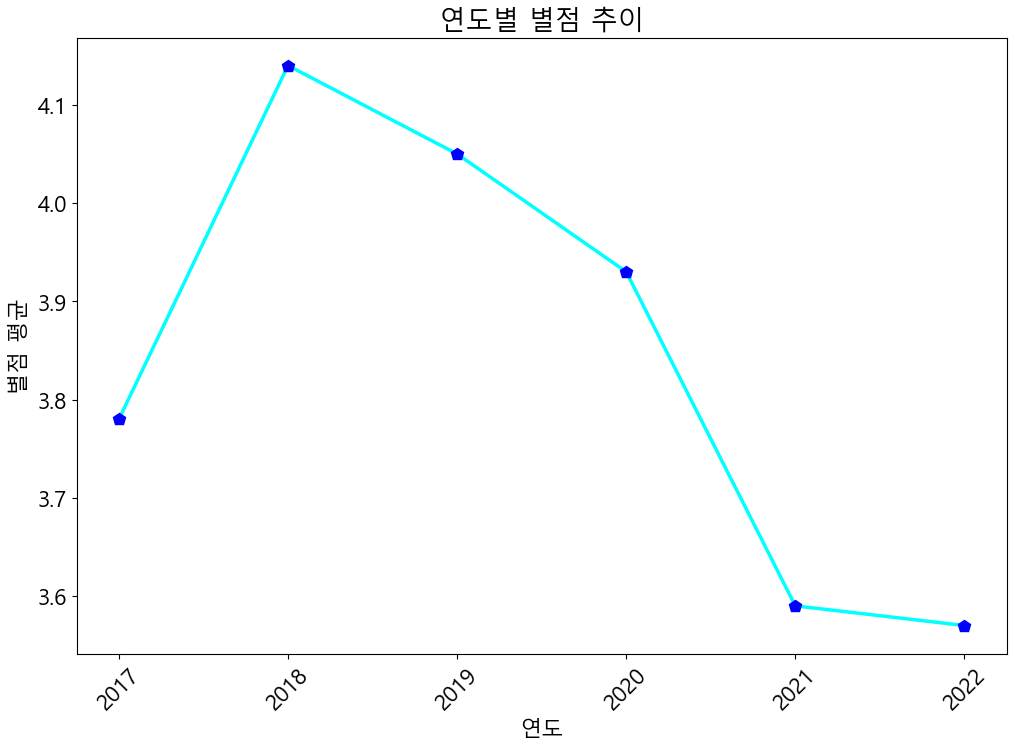

In [464]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(ratings['연도'], ratings['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('연도별 별점 추이')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

### 분기별

In [465]:
ratings2 = combined_ratings.groupby(['연도', '분기'])['별점'].mean().reset_index()
ratings2

,연도,분기,별점
0,2009,2009Q2,4.565069
1,2009,2009Q3,1.826028
2,2010,2010Q1,3.956393
3,2010,2010Q2,4.565069
4,2010,2010Q4,4.238251
5,2011,2011Q1,4.565069
6,2011,2011Q2,2.130366
7,2011,2011Q3,4.565069
8,2011,2011Q4,3.351175
9,2012,2012Q1,4.016117


In [466]:
ratings2 = ratings2[ratings2['연도'].astype(str).astype(int)>=2017]
ratings2['분기'] = ratings2['분기'].astype(str)
ratings2['별점'] = ratings2['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
ratings2

C:\Users\user\AppData\Local\Temp\ipykernel_2648\875704488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings2['분기'] = ratings2['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\875704488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings2['별점'] = ratings2['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)


,연도,분기,별점
29,2017,2017Q1,3.70
30,2017,2017Q2,3.72
31,2017,2017Q3,3.72
32,2017,2017Q4,3.84
33,2018,2018Q1,3.71
34,2018,2018Q2,3.60
35,2018,2018Q3,3.58
36,2018,2018Q4,4.26
37,2019,2019Q1,3.77
38,2019,2019Q2,3.56


#### 그래프

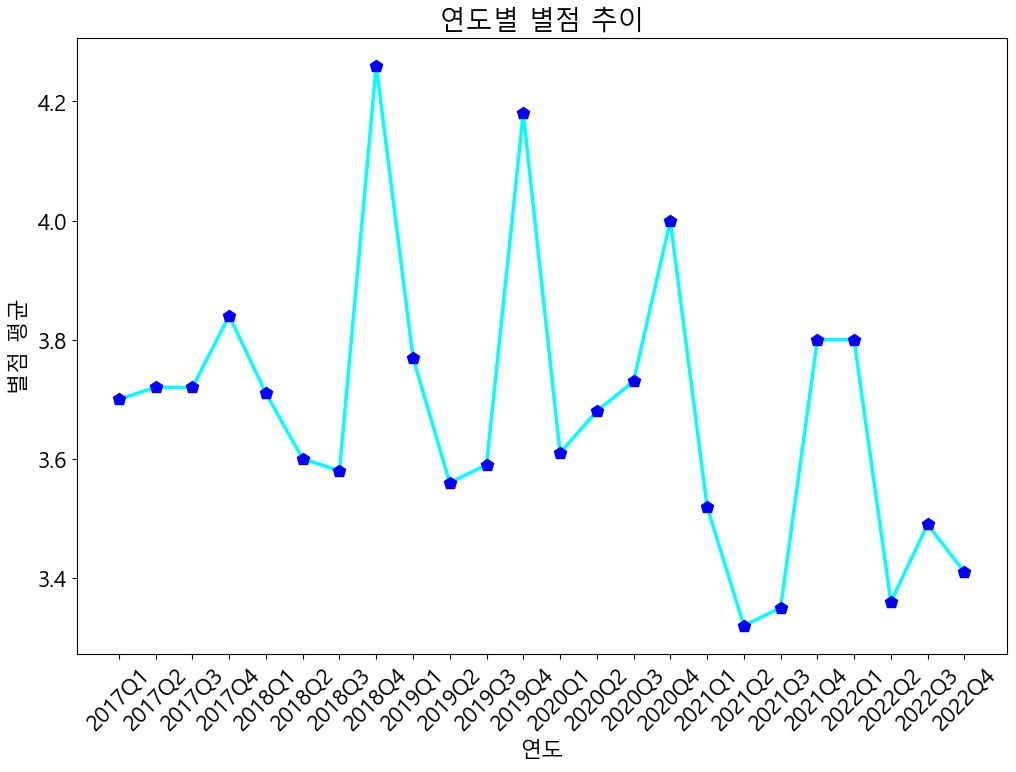

In [467]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(ratings2['분기'], ratings2['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('연도별 별점 추이')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

## 채널별

In [468]:
r1 = combined_ratings.groupby(['연도', '분기', '채널명'])['별점'].mean().reset_index()
r1

,연도,분기,채널명,별점
0,2009,2009Q2,amazon,4.565069
1,2009,2009Q3,amazon,1.826028
2,2010,2010Q1,amazon,3.956393
3,2010,2010Q2,amazon,4.565069
4,2010,2010Q4,costco,4.238251
...,...,...,...,...
197,2022,2022Q4,build.com,2.831169
198,2022,2022Q4,costco,3.873587
199,2022,2022Q4,hd,3.149716
200,2022,2022Q4,lowes,2.794259


In [469]:
r1 = r1[r1['연도'].astype(str).astype(int)>=2017]
r1['연도'] = r1['연도'].astype(str)
r1['분기'] = r1['분기'].astype(str)
r1['별점'] = r1['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r1

C:\Users\user\AppData\Local\Temp\ipykernel_2648\250560765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1['연도'] = r1['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\250560765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1['분기'] = r1['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\250560765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,연도,분기,채널명,별점
73,2017,2017Q1,amazon,3.86
74,2017,2017Q1,build.com,3.83
75,2017,2017Q1,hd,4.24
76,2017,2017Q1,lowes,3.01
77,2017,2017Q1,walmart,3.45
...,...,...,...,...
197,2022,2022Q4,build.com,2.83
198,2022,2022Q4,costco,3.87
199,2022,2022Q4,hd,3.15
200,2022,2022Q4,lowes,2.79


In [470]:
r1[r1['채널명']=='costco']

,연도,분기,채널명,별점
90,2017,2017Q4,costco,4.14
111,2018,2018Q4,costco,4.32
132,2019,2019Q4,costco,4.27
153,2020,2020Q4,costco,4.06
174,2021,2021Q4,costco,4.04
180,2022,2022Q1,costco,4.10
186,2022,2022Q2,costco,3.66
192,2022,2022Q3,costco,3.96
198,2022,2022Q4,costco,3.87


In [471]:
r1['채널명'].unique()

array(['amazon', 'build.com', 'hd', 'lowes', 'walmart', 'costco'],
      dtype=object)

In [472]:
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = r1.pivot_table(values='별점', index='분기', columns='채널명')
df_pivot['costco'].fillna(method='bfill', inplace=True)
df_pivot

채널명,amazon,build.com,costco,hd,lowes,walmart
분기,,,,,,
2017Q1,3.86,3.83,4.14,4.24,3.01,3.45
2017Q2,3.51,3.97,4.14,4.33,3.43,3.58
2017Q3,3.29,3.87,4.14,4.21,3.61,3.74
2017Q4,3.28,2.89,4.14,3.83,2.61,3.45
2018Q1,3.68,3.76,4.32,4.03,3.25,3.79
2018Q2,3.54,3.60,4.32,3.91,3.20,3.98
2018Q3,3.54,3.91,4.32,3.95,2.97,3.64
2018Q4,3.70,3.65,4.32,3.80,3.12,3.76
2019Q1,3.75,4.04,4.27,3.77,3.19,3.92


#### 그래프

<Figure size 2000x1600 with 0 Axes>

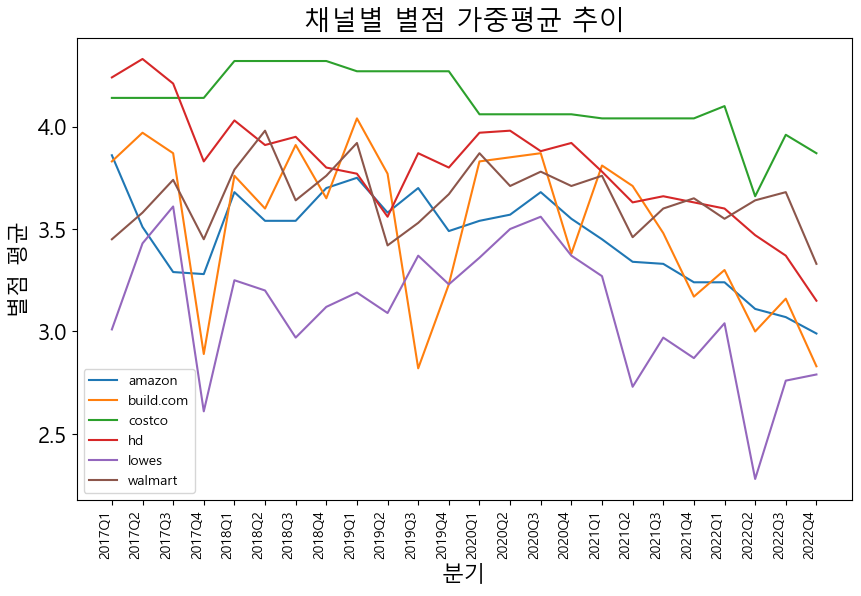

In [473]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = r1.pivot_table(values='별점', index='분기', columns='채널명')
df_pivot['costco'].fillna(method='bfill', inplace=True)
df_pivot

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('채널별 별점 가중평균 추이')
ax.set_xlabel('분기')
ax.set_ylabel('별점 평균')
ax.legend(fontsize=10)  # 범례 크기 조정
# x축 눈금 간격 조절
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df_pivot.index)))

# x축 눈금 레이블 회전하기
plt.xticks(ticks=range(len(df_pivot.index)), labels=df_pivot.index, fontsize=10, rotation=90, ha='right')
plt.show()

#### 막대그래프
- 평점 1위 : 항상 Walmart
- 평점 2-3위 : Build.com과 Lowes
- 평점 최하위 : Amazon

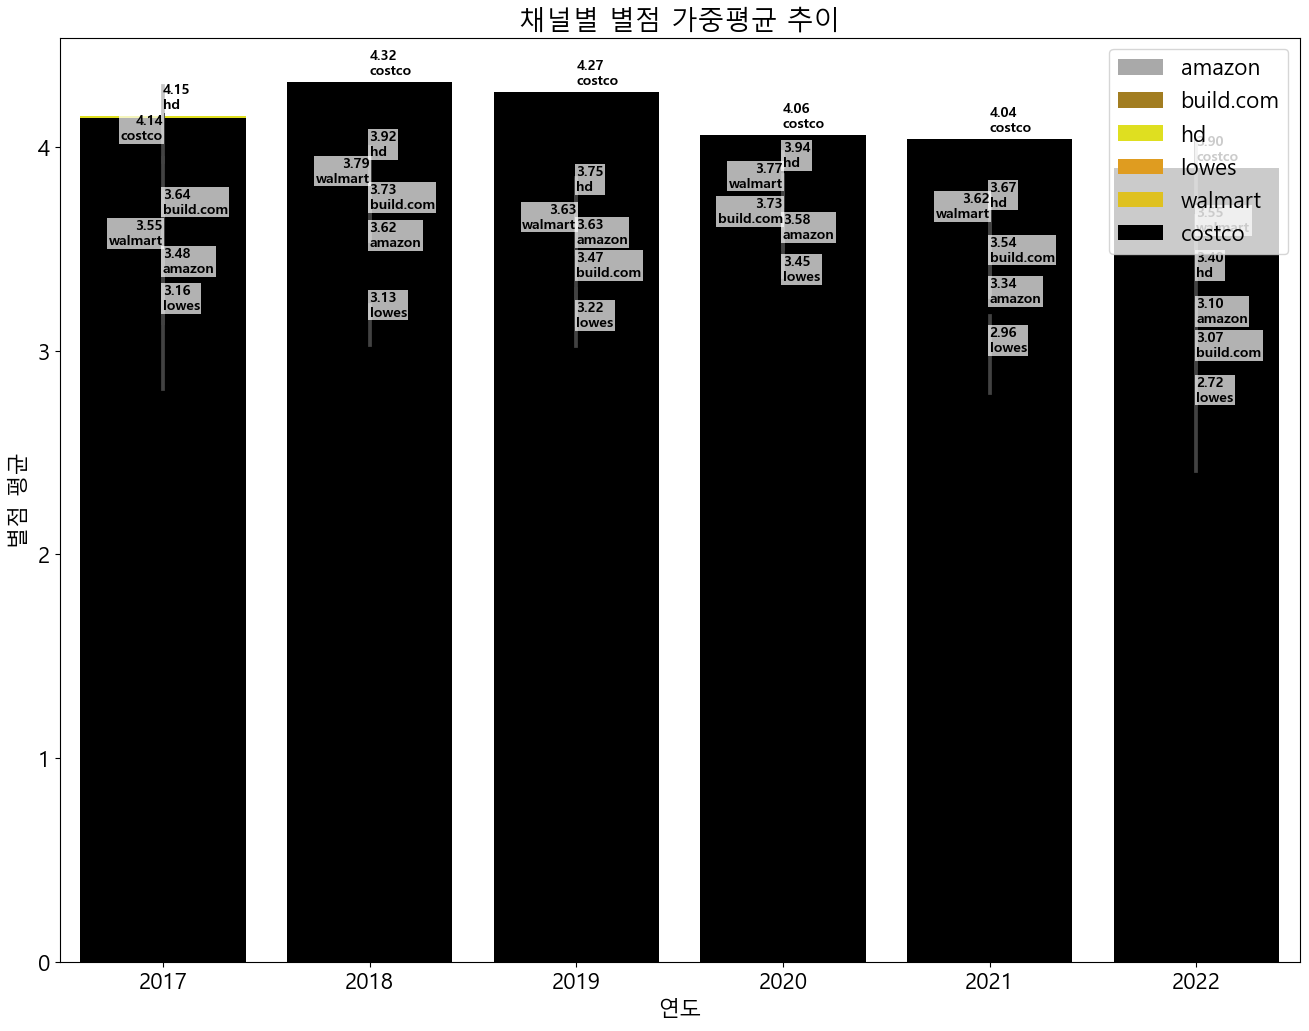

In [474]:
plt.figure(figsize=(16, 12))
# 채널별 색상 팔레트 지정
channel = {'costco':'black', 'amazon': 'darkgrey', 'build.com':'darkgoldenrod', 'walmart': 'gold', 'hd':'yellow', 'lowes':'orange'}
palette = sns.color_palette([channel[x] for x in r1['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=r1, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('채널별 별점 가중평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

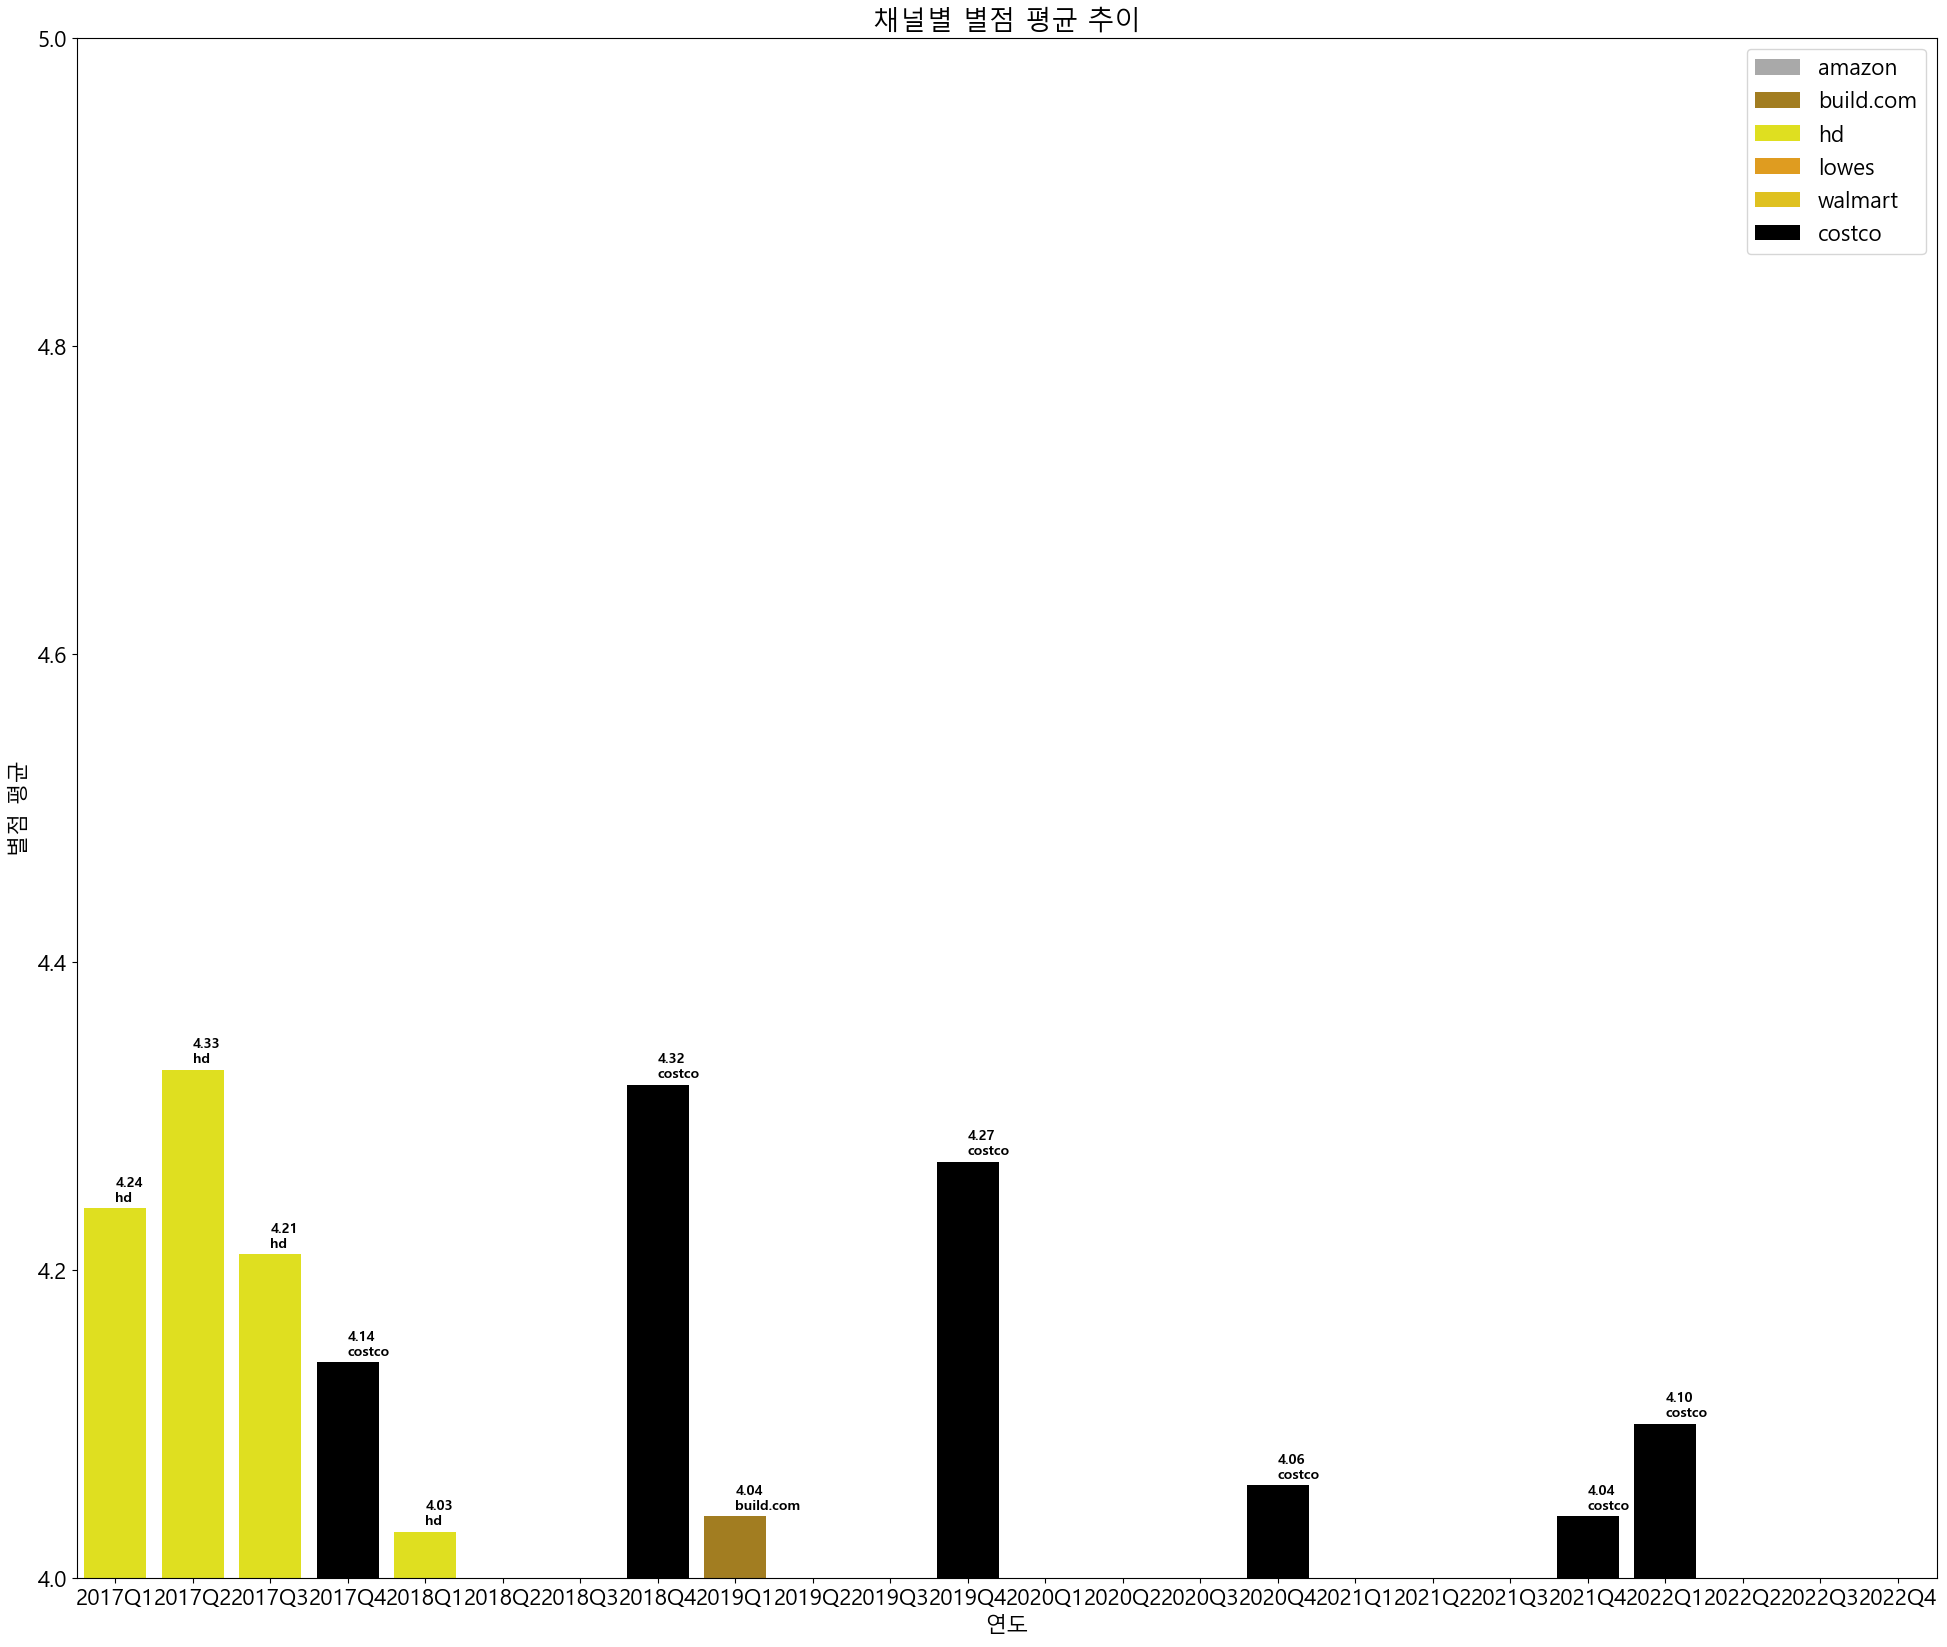

In [475]:
import adjustText

plt.figure(figsize=(24,20))
palette = sns.color_palette([channel[x] for x in r1['채널명'].unique()])
ax = sns.barplot(x='분기', y='별점', hue='채널명', data=r1, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# y축 범위 지정하기
ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('채널별 별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 코스트코

In [476]:
r2 = r1[r1['채널명']=='costco']
r2

,연도,분기,채널명,별점
90,2017,2017Q4,costco,4.14
111,2018,2018Q4,costco,4.32
132,2019,2019Q4,costco,4.27
153,2020,2020Q4,costco,4.06
174,2021,2021Q4,costco,4.04
180,2022,2022Q1,costco,4.10
186,2022,2022Q2,costco,3.66
192,2022,2022Q3,costco,3.96
198,2022,2022Q4,costco,3.87


In [477]:
r2 = r2[['분기', '별점']]
r2

,분기,별점
90,2017Q4,4.14
111,2018Q4,4.32
132,2019Q4,4.27
153,2020Q4,4.06
174,2021Q4,4.04
180,2022Q1,4.10
186,2022Q2,3.66
192,2022Q3,3.96
198,2022Q4,3.87


#### 그래프

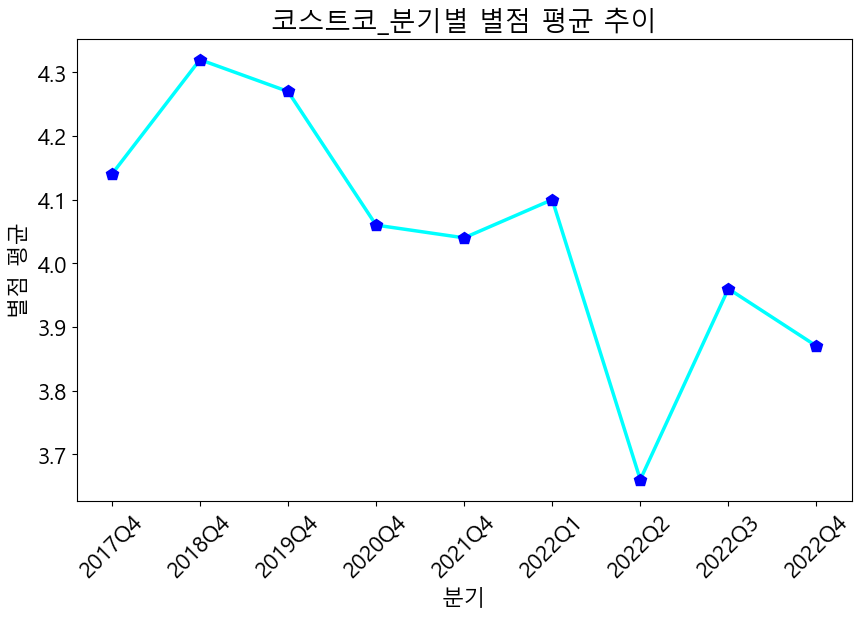

In [478]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r2['분기'], r2['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('코스트코_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [479]:
r22 = combined_ratings[combined_ratings['채널명']=='costco']
r22

,회사명,제품명,작성일,별점,채널명,연도,분기
6782,biobidet,BB Elite3,2020-11-29,4.605079,costco,2020,2020Q4
6783,biobidet,BB Elite3,2018-11-30,3.684063,costco,2018,2018Q4
6784,biobidet,BB Elite3,2020-11-29,4.605079,costco,2020,2020Q4
6785,biobidet,BB Elite3,2019-11-30,4.605079,costco,2019,2019Q4
6786,biobidet,BB Elite3,2020-11-29,4.605079,costco,2020,2020Q4
...,...,...,...,...,...,...,...
24466,ovedecors,Irenne,2022-02-03,3.720470,costco,2022,2022Q1
24467,ovedecors,Irenne,2022-06-03,3.720470,costco,2022,2022Q2
24468,ovedecors,Irenne,2022-06-03,2.976376,costco,2022,2022Q2
24469,ovedecors,Irenne,2020-11-30,3.720470,costco,2020,2020Q4


In [480]:
r22 = r22.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r22

,연도,분기,회사명,별점
0,2010,2010Q4,brondell,4.238251
1,2011,2011Q4,brondell,4.163896
2,2012,2012Q4,biobidet,4.180777
3,2012,2012Q4,brondell,4.461317
4,2013,2013Q4,biobidet,4.207299
5,2013,2013Q4,brondell,4.461317
6,2014,2014Q4,biobidet,4.462342
7,2014,2014Q4,brondell,3.301375
8,2015,2015Q4,biobidet,4.266665
9,2015,2015Q4,brondell,3.726512


In [481]:
r22 = r22[r22['연도'].astype(str).astype(int)>=2017]
r22['연도'] = r22['연도'].astype(str)
r22['분기'] = r22['분기'].astype(str)
r22['별점'] = r22['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r22

C:\Users\user\AppData\Local\Temp\ipykernel_2648\4274208642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r22['연도'] = r22['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\4274208642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r22['분기'] = r22['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\4274208642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,연도,분기,회사명,별점
12,2017,2017Q4,biobidet,4.23
13,2017,2017Q4,brondell,4.05
14,2018,2018Q4,biobidet,4.43
15,2018,2018Q4,brondell,4.01
16,2019,2019Q4,biobidet,4.39
17,2019,2019Q4,brondell,3.97
18,2019,2019Q4,ovedecors,3.04
19,2020,2020Q4,biobidet,4.25
20,2020,2020Q4,brondell,3.63
21,2020,2020Q4,ovedecors,3.16


#### 막대그래프

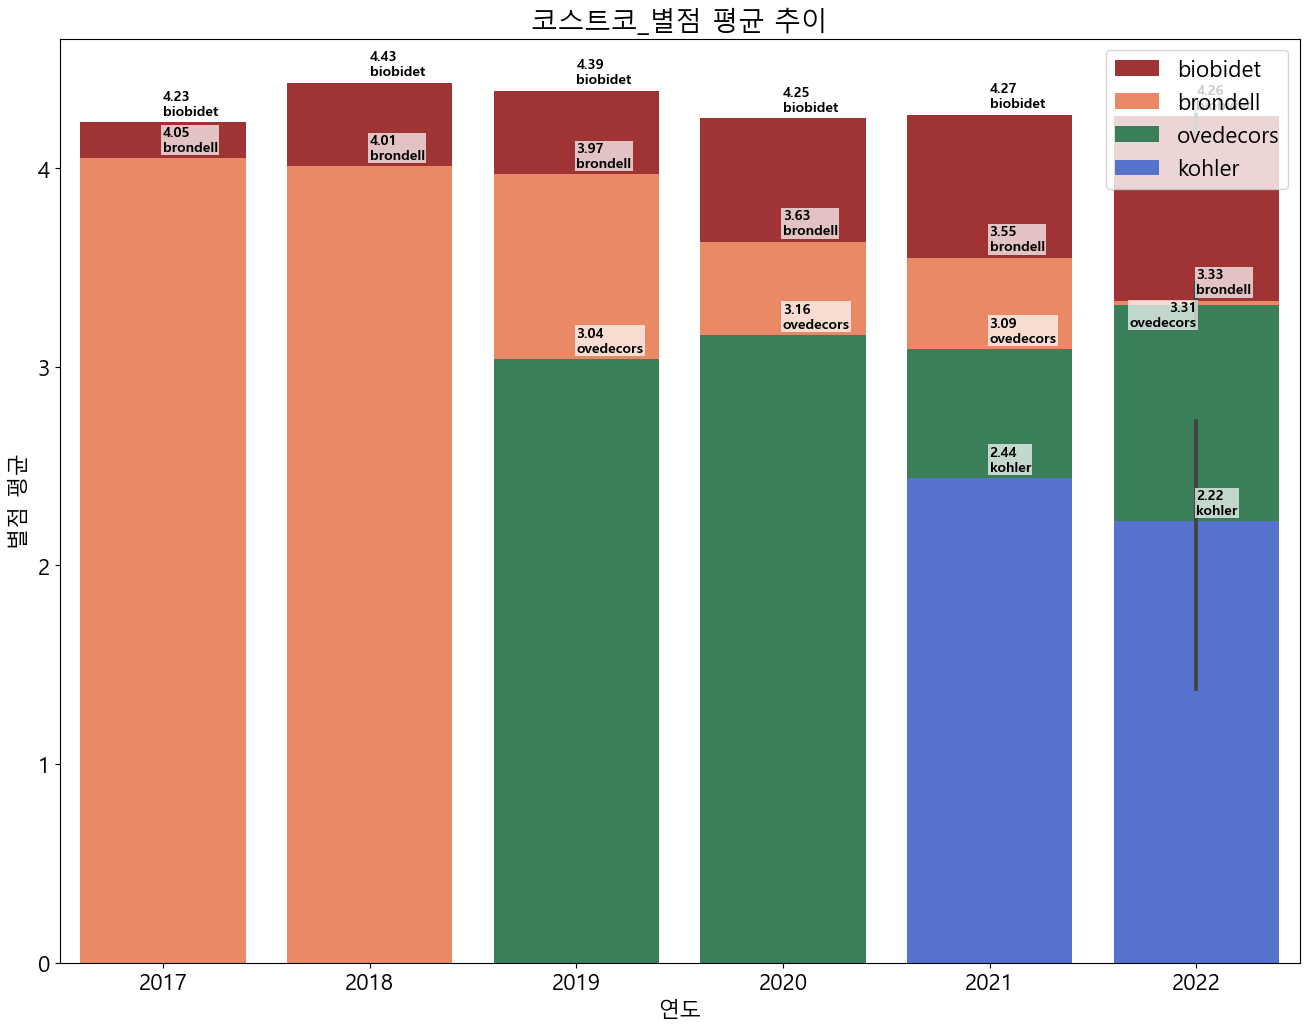

In [482]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r22['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r22, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('코스트코_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 코스트코 제외

In [483]:
r3 = r1[r1['채널명']!='costco']
r3

,연도,분기,채널명,별점
73,2017,2017Q1,amazon,3.86
74,2017,2017Q1,build.com,3.83
75,2017,2017Q1,hd,4.24
76,2017,2017Q1,lowes,3.01
77,2017,2017Q1,walmart,3.45
...,...,...,...,...
196,2022,2022Q4,amazon,2.99
197,2022,2022Q4,build.com,2.83
199,2022,2022Q4,hd,3.15
200,2022,2022Q4,lowes,2.79


In [484]:
r3 = r3.groupby('분기')[['별점']].mean().reset_index()
r3

,분기,별점
0,2017Q1,3.678
1,2017Q2,3.764
2,2017Q3,3.744
3,2017Q4,3.212
4,2018Q1,3.702
5,2018Q2,3.646
6,2018Q3,3.602
7,2018Q4,3.606
8,2019Q1,3.734
9,2019Q2,3.484


#### 그래프

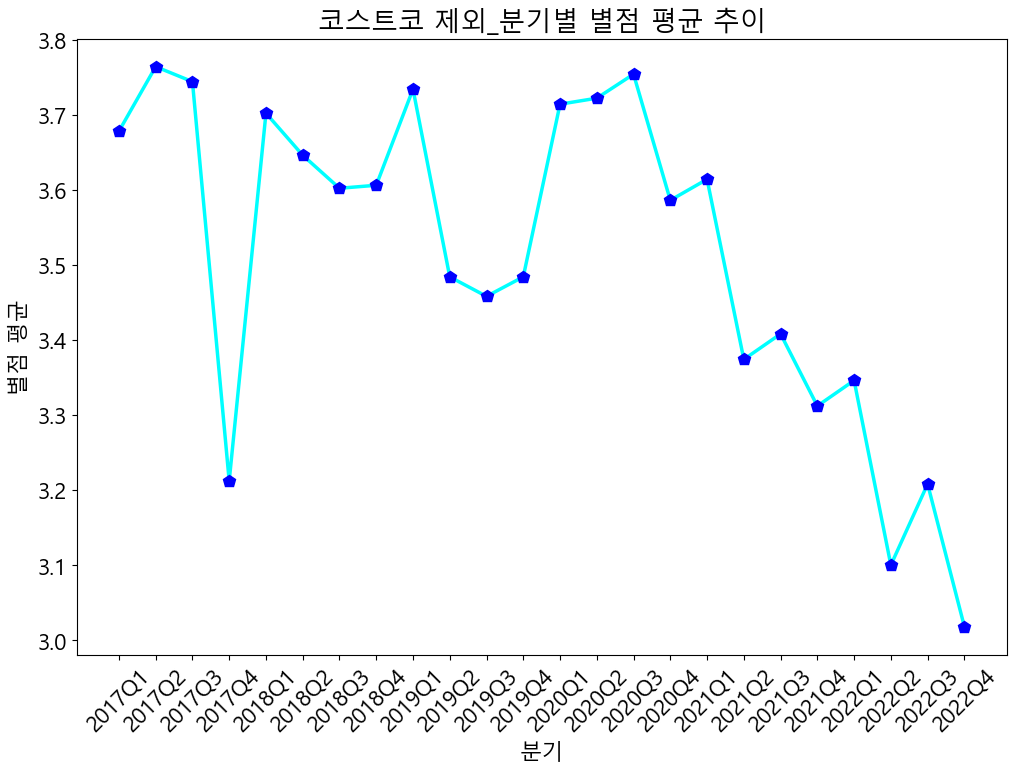

In [485]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r3['분기'], r3['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('코스트코 제외_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [486]:
r33 = combined_ratings[combined_ratings['채널명']!='costco']
r33

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [487]:
r33 = r33.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r33

,연도,분기,회사명,별점
0,2009,2009Q2,biobidet,4.565069
1,2009,2009Q3,biobidet,1.826028
2,2010,2010Q1,biobidet,3.956393
3,2010,2010Q2,biobidet,4.565069
4,2011,2011Q1,biobidet,4.565069
...,...,...,...,...
224,2022,2022Q4,brondell,2.636169
225,2022,2022Q4,kohler,1.907678
226,2022,2022Q4,toto,2.993208
227,2022,2022Q4,tushy,3.115534


In [488]:
r33 = r33[r33['연도'].astype(str).astype(int)>=2017]
r33['연도'] = r33['연도'].astype(str)
r33['분기'] = r33['분기'].astype(str)
r33['별점'] = r33['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r33

C:\Users\user\AppData\Local\Temp\ipykernel_2648\2764864381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r33['연도'] = r33['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\2764864381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r33['분기'] = r33['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\2764864381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,연도,분기,회사명,별점
62,2017,2017Q1,alphabidet,3.57
63,2017,2017Q1,biobidet,3.73
64,2017,2017Q1,brondell,2.69
65,2017,2017Q1,kohler,3.04
66,2017,2017Q2,alphabidet,3.28
...,...,...,...,...
224,2022,2022Q4,brondell,2.64
225,2022,2022Q4,kohler,1.91
226,2022,2022Q4,toto,2.99
227,2022,2022Q4,tushy,3.12


#### 막대그래프

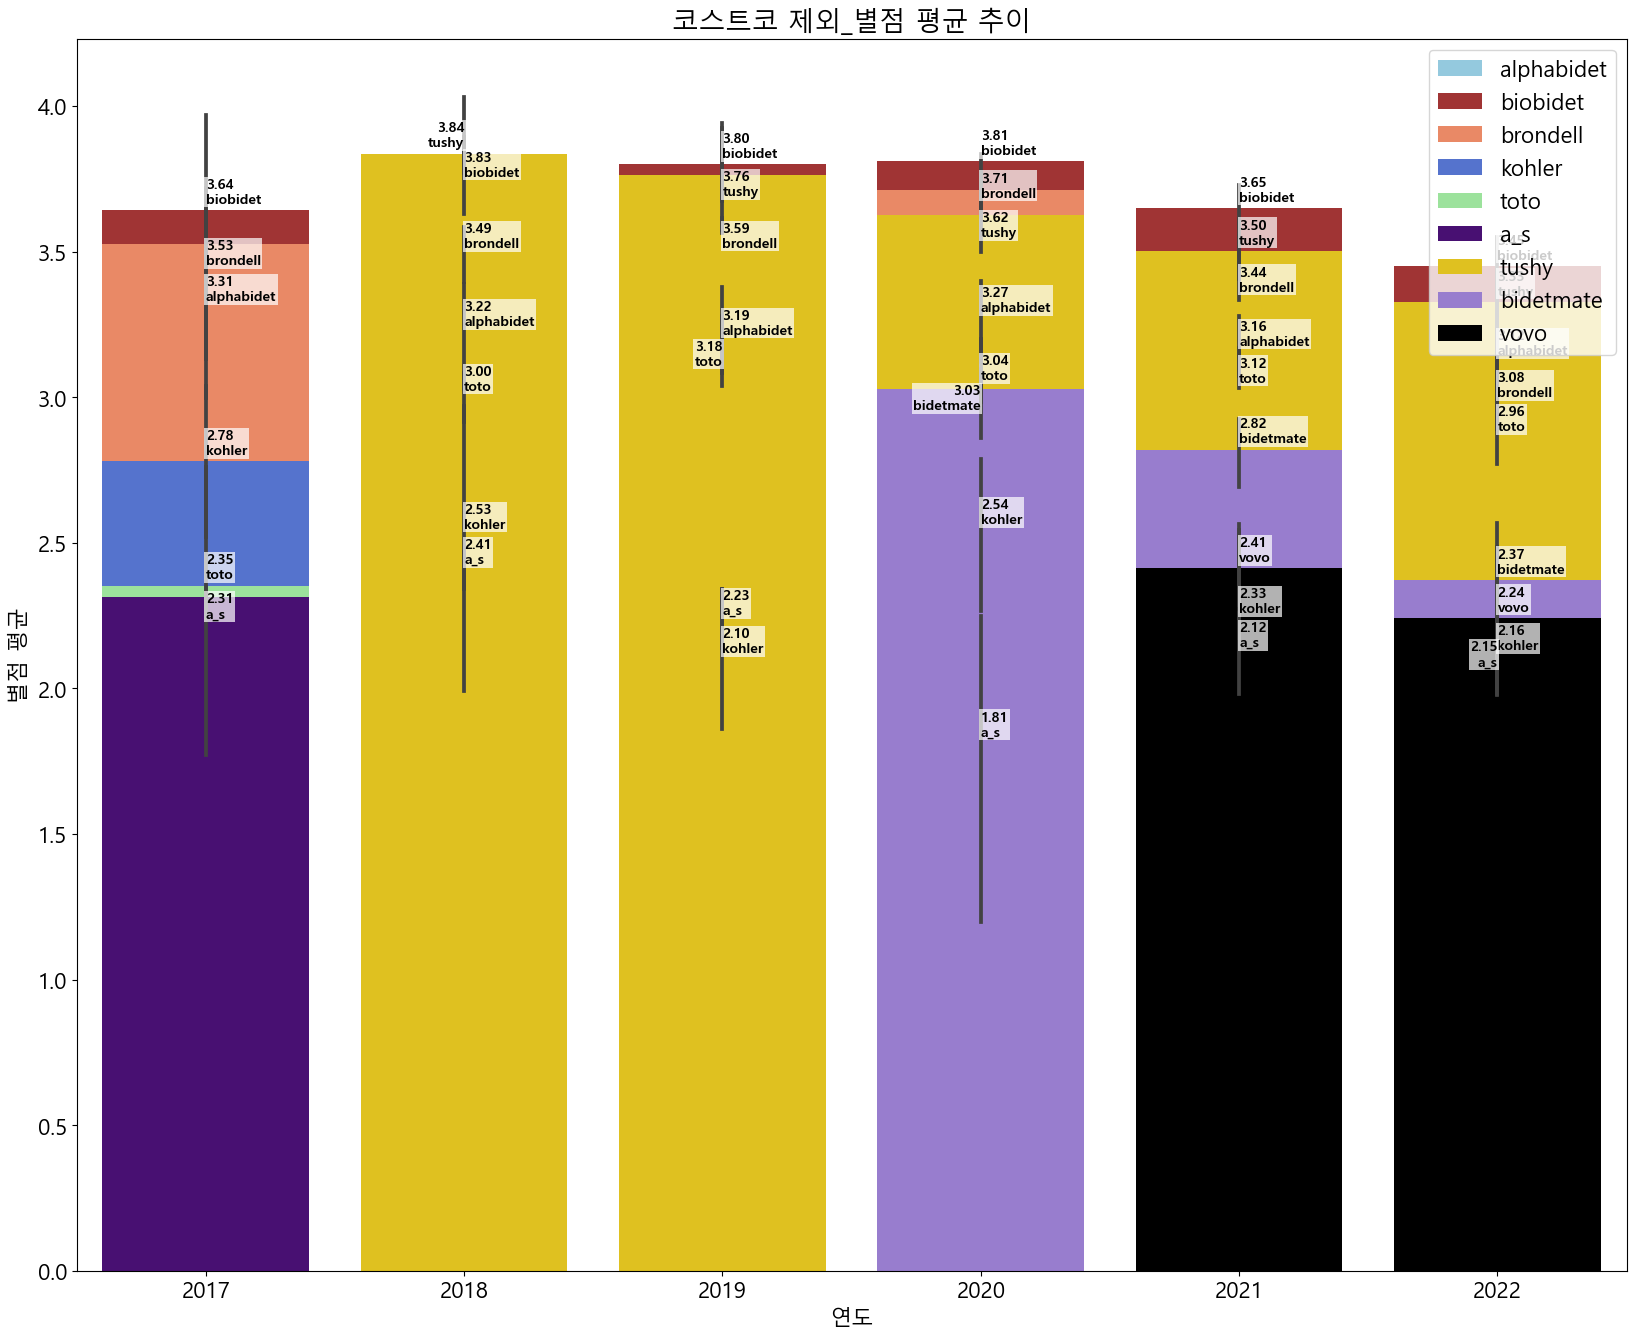

In [489]:
plt.figure(figsize=(20, 16))
palette = sns.color_palette([colors[x] for x in r33['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r33, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('코스트코 제외_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 아마존

In [490]:
r4 = r1[r1['채널명']=='walmart']
r4

,연도,분기,채널명,별점
77,2017,2017Q1,walmart,3.45
82,2017,2017Q2,walmart,3.58
87,2017,2017Q3,walmart,3.74
93,2017,2017Q4,walmart,3.45
98,2018,2018Q1,walmart,3.79
103,2018,2018Q2,walmart,3.98
108,2018,2018Q3,walmart,3.64
114,2018,2018Q4,walmart,3.76
119,2019,2019Q1,walmart,3.92
124,2019,2019Q2,walmart,3.42


In [491]:
r4 = r4[['분기', '별점']]
r4

,분기,별점
77,2017Q1,3.45
82,2017Q2,3.58
87,2017Q3,3.74
93,2017Q4,3.45
98,2018Q1,3.79
103,2018Q2,3.98
108,2018Q3,3.64
114,2018Q4,3.76
119,2019Q1,3.92
124,2019Q2,3.42


#### 그래프

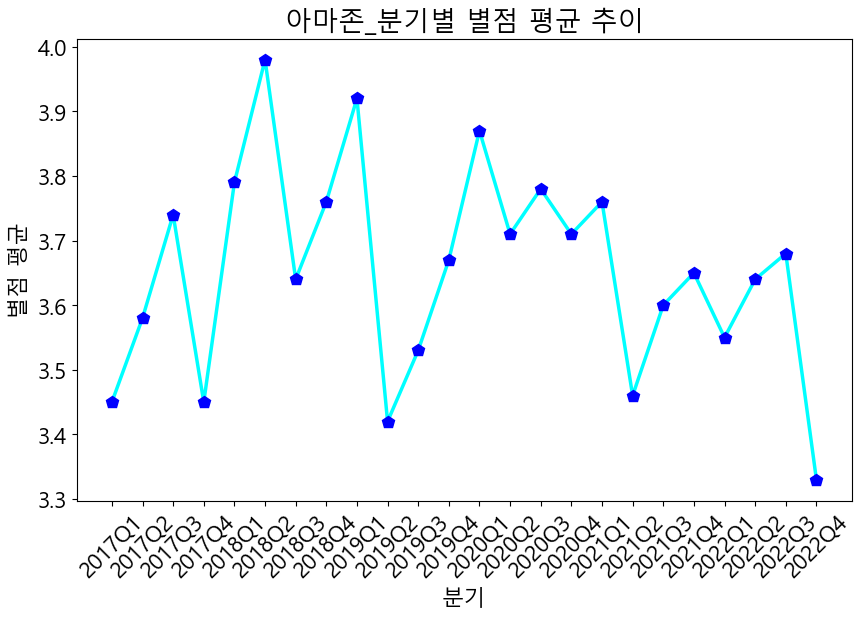

In [492]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r4['분기'], r4['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('아마존_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [493]:
r44 = combined_ratings[combined_ratings['채널명']=='amazon']
r44

,회사명,제품명,작성일,별점,채널명,연도,분기
98,brondell,SE600,2022-11-22,3.565276,amazon,2022,2022Q4
99,brondell,SE600,2022-11-18,0.713055,amazon,2022,2022Q4
100,brondell,SE600,2022-10-26,3.565276,amazon,2022,2022Q4
101,brondell,SE600,2022-09-15,0.713055,amazon,2022,2022Q3
102,brondell,SE600,2022-09-10,0.713055,amazon,2022,2022Q3
...,...,...,...,...,...,...,...
30479,bidetmate,2000 Series,2022-03-24,2.714970,amazon,2022,2022Q1
30480,bidetmate,2000 Series,2022-03-23,2.714970,amazon,2022,2022Q1
30481,bidetmate,2000 Series,2022-03-17,2.714970,amazon,2022,2022Q1
30482,bidetmate,2000 Series,2022-03-15,2.714970,amazon,2022,2022Q1


In [494]:
r44 = r44.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r44

,연도,분기,회사명,별점
0,2009,2009Q2,biobidet,4.565069
1,2009,2009Q3,biobidet,1.826028
2,2010,2010Q1,biobidet,3.956393
3,2010,2010Q2,biobidet,4.565069
4,2011,2011Q1,biobidet,4.565069
...,...,...,...,...
165,2022,2022Q4,bidetmate,2.290197
166,2022,2022Q4,biobidet,3.143050
167,2022,2022Q4,brondell,2.594232
168,2022,2022Q4,toto,2.950441


In [495]:
r44 = r44[r44['연도'].astype(str).astype(int)>=2017]
r44['연도'] = r44['연도'].astype(str)
r44['분기'] = r44['분기'].astype(str)
r44['별점'] = r44['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r44

C:\Users\user\AppData\Local\Temp\ipykernel_2648\3829859784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r44['연도'] = r44['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\3829859784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r44['분기'] = r44['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\3829859784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,연도,분기,회사명,별점
47,2017,2017Q1,alphabidet,3.57
48,2017,2017Q1,biobidet,3.88
49,2017,2017Q2,alphabidet,3.28
50,2017,2017Q2,biobidet,3.71
51,2017,2017Q2,brondell,4.03
...,...,...,...,...
165,2022,2022Q4,bidetmate,2.29
166,2022,2022Q4,biobidet,3.14
167,2022,2022Q4,brondell,2.59
168,2022,2022Q4,toto,2.95


#### 막대그래프

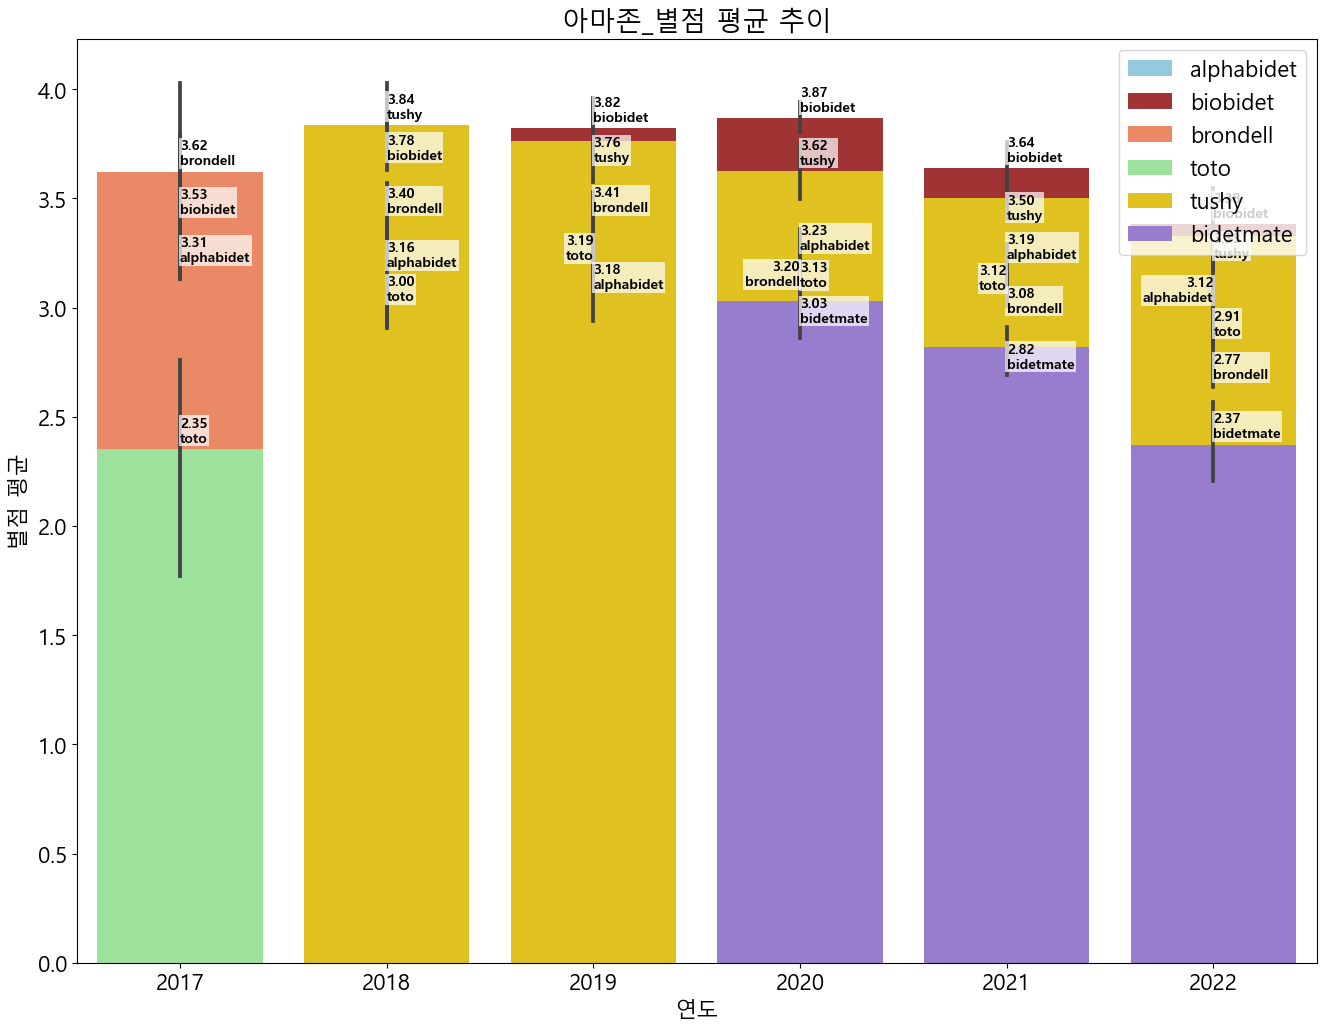

In [496]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r44['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r44, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('아마존_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 빌드컴

In [497]:
r5 = r1[r1['채널명']=='build.com']
r5

,연도,분기,채널명,별점
74,2017,2017Q1,build.com,3.83
79,2017,2017Q2,build.com,3.97
84,2017,2017Q3,build.com,3.87
89,2017,2017Q4,build.com,2.89
95,2018,2018Q1,build.com,3.76
100,2018,2018Q2,build.com,3.60
105,2018,2018Q3,build.com,3.91
110,2018,2018Q4,build.com,3.65
116,2019,2019Q1,build.com,4.04
121,2019,2019Q2,build.com,3.77


In [498]:
r5 = r5[['분기', '별점']]
r5

,분기,별점
74,2017Q1,3.83
79,2017Q2,3.97
84,2017Q3,3.87
89,2017Q4,2.89
95,2018Q1,3.76
100,2018Q2,3.60
105,2018Q3,3.91
110,2018Q4,3.65
116,2019Q1,4.04
121,2019Q2,3.77


#### 그래프

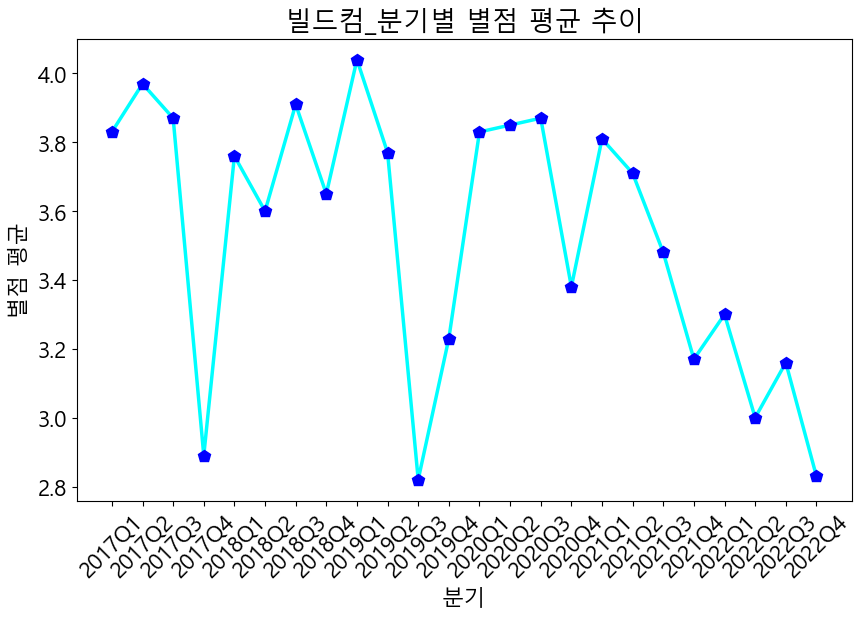

In [499]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r5['분기'], r5['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('빌드컴_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [500]:
r55 = combined_ratings[combined_ratings['채널명']=='build.com']
r55

,회사명,제품명,작성일,별점,채널명,연도,분기
2544,brondell,S1400,2017-04-27,4.24419,build.com,2017,2017Q2
2545,brondell,S1400,2017-04-28,4.24419,build.com,2017,2017Q2
2546,brondell,S1400,2017-04-29,4.24419,build.com,2017,2017Q2
2547,brondell,S1400,2017-04-29,4.24419,build.com,2017,2017Q2
2548,brondell,S1400,2017-05-06,4.24419,build.com,2017,2017Q2
...,...,...,...,...,...,...,...
30894,toto,SW3046 S500,2022-01-21,1.78086,build.com,2022,2022Q1
30895,toto,SW3046 S500,2022-04-10,1.78086,build.com,2022,2022Q2
30896,toto,SW3046 S500,2022-05-04,1.78086,build.com,2022,2022Q2
30897,toto,SW3046 S500,2022-06-17,1.78086,build.com,2022,2022Q2


In [501]:
r55 = r55.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r55

,연도,분기,회사명,별점
0,2015,2015Q1,biobidet,3.634851
1,2015,2015Q2,biobidet,3.546220
2,2015,2015Q3,biobidet,3.800720
3,2015,2015Q3,kohler,2.733347
4,2015,2015Q4,biobidet,4.358178
...,...,...,...,...
95,2022,2022Q3,kohler,2.021802
96,2022,2022Q3,toto,3.419085
97,2022,2022Q4,biobidet,3.868609
98,2022,2022Q4,kohler,1.926666


In [502]:
r55 = r55[r55['연도'].astype(str).astype(int)>=2017]
r55['연도'] = r55['연도'].astype(str)
r55['분기'] = r55['분기'].astype(str)
r55['별점'] = r55['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r55

C:\Users\user\AppData\Local\Temp\ipykernel_2648\85312824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['연도'] = r55['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\85312824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['분기'] = r55['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\85312824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,연도,분기,회사명,별점
10,2017,2017Q1,biobidet,3.84
11,2017,2017Q1,kohler,3.04
12,2017,2017Q2,biobidet,3.92
13,2017,2017Q2,brondell,4.24
14,2017,2017Q3,a_s,2.35
...,...,...,...,...
95,2022,2022Q3,kohler,2.02
96,2022,2022Q3,toto,3.42
97,2022,2022Q4,biobidet,3.87
98,2022,2022Q4,kohler,1.93


#### 막대그래프

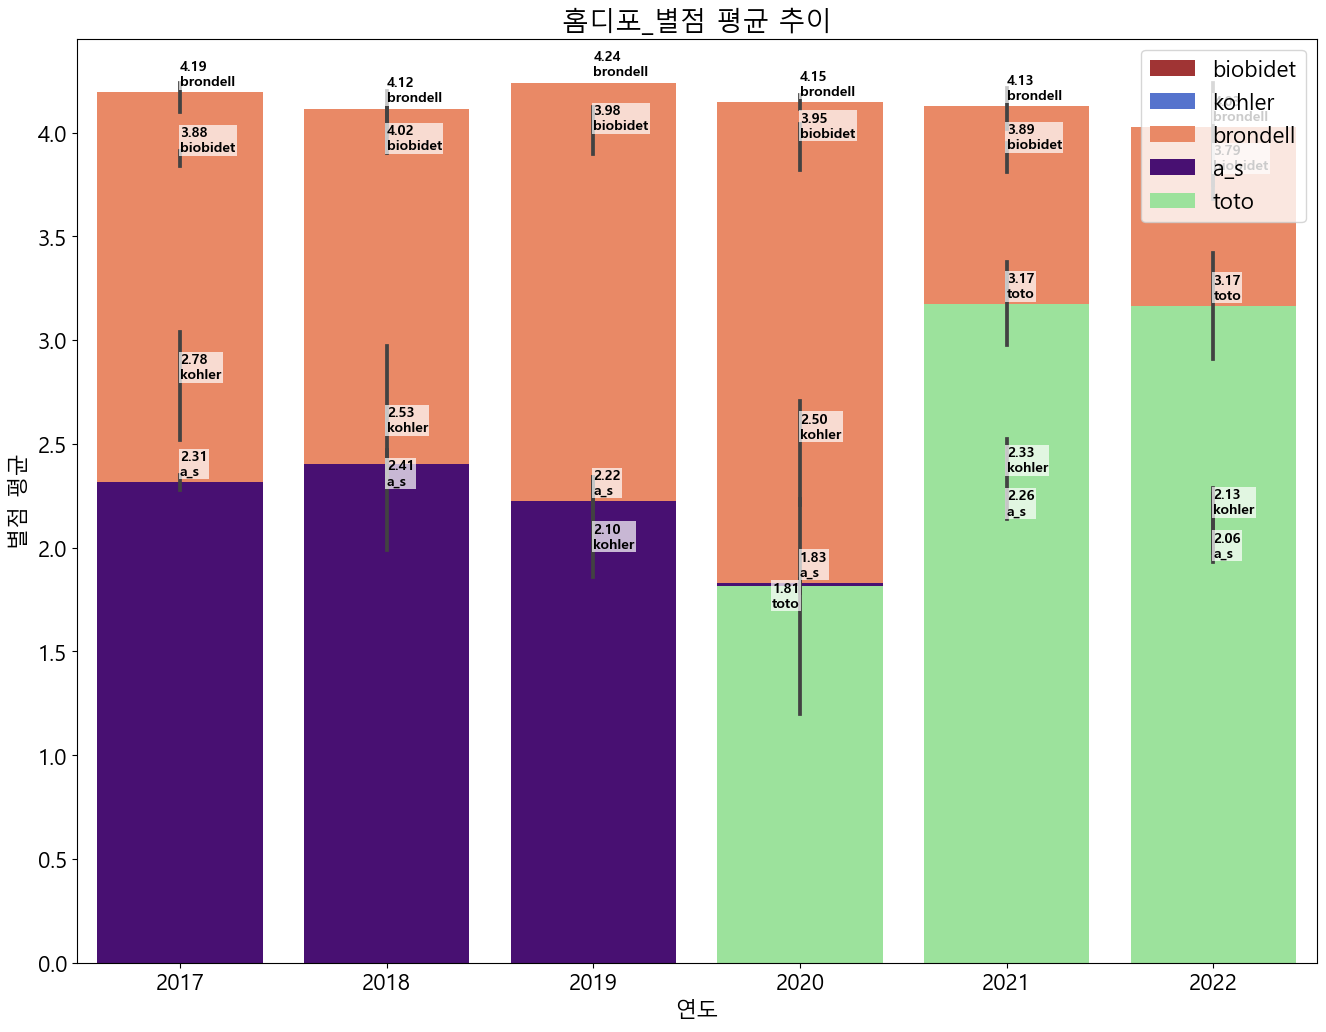

In [503]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r55['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r55, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('홈디포_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 홈디포

In [504]:
r6 = r1[r1['채널명']=='hd']
r6

,연도,분기,채널명,별점
75,2017,2017Q1,hd,4.24
80,2017,2017Q2,hd,4.33
85,2017,2017Q3,hd,4.21
91,2017,2017Q4,hd,3.83
96,2018,2018Q1,hd,4.03
101,2018,2018Q2,hd,3.91
106,2018,2018Q3,hd,3.95
112,2018,2018Q4,hd,3.80
117,2019,2019Q1,hd,3.77
122,2019,2019Q2,hd,3.56


In [505]:
r6 = r6[['분기', '별점']]
r6

,분기,별점
75,2017Q1,4.24
80,2017Q2,4.33
85,2017Q3,4.21
91,2017Q4,3.83
96,2018Q1,4.03
101,2018Q2,3.91
106,2018Q3,3.95
112,2018Q4,3.80
117,2019Q1,3.77
122,2019Q2,3.56


#### 그래프

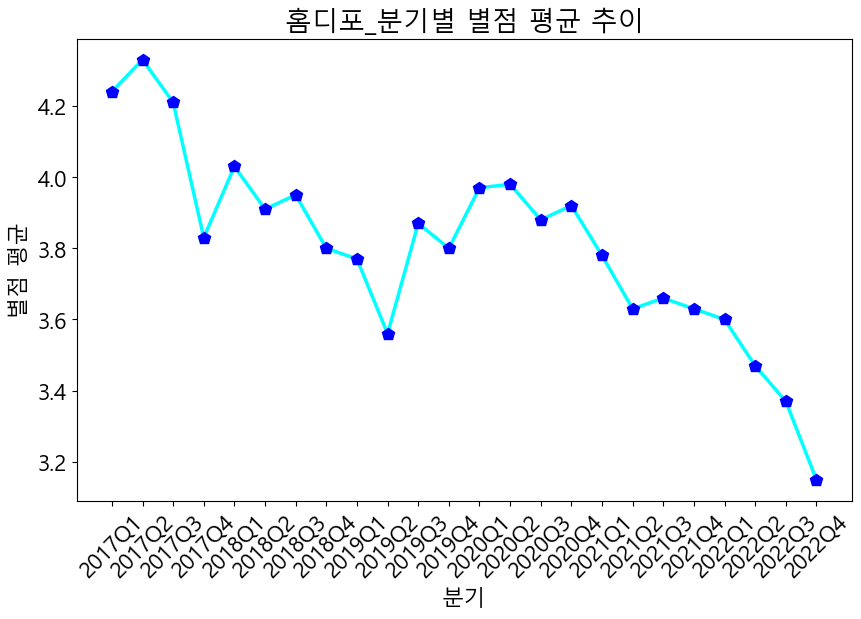

In [506]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r6['분기'], r6['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('홈디포_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [507]:
r55 = combined_ratings[combined_ratings['채널명']=='hd']
r55

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
6404,toto,SW3084 C5,2022-10-14,3.659798,hd,2022,2022Q4
6405,toto,SW3084 C5,2022-10-16,3.659798,hd,2022,2022Q4
6406,toto,SW3084 C5,2022-10-27,3.659798,hd,2022,2022Q4
6407,toto,SW3084 C5,2022-11-09,2.927838,hd,2022,2022Q4


In [508]:
r55 = r55.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r55

,연도,분기,회사명,별점
0,2012,2012Q3,biobidet,4.565069
1,2013,2013Q1,biobidet,4.565069
2,2013,2013Q2,biobidet,0.913014
3,2013,2013Q3,biobidet,4.565069
4,2014,2014Q2,biobidet,4.565069
...,...,...,...,...
82,2022,2022Q3,toto,3.358511
83,2022,2022Q4,alphabidet,3.210198
84,2022,2022Q4,biobidet,4.565069
85,2022,2022Q4,brondell,2.376747


In [509]:
r55 = r55[r55['연도'].astype(str).astype(int)>=2017]
r55['연도'] = r55['연도'].astype(str)
r55['분기'] = r55['분기'].astype(str)
r55['별점'] = r55['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r55

C:\Users\user\AppData\Local\Temp\ipykernel_2648\85312824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['연도'] = r55['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\85312824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r55['분기'] = r55['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\85312824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,연도,분기,회사명,별점
12,2017,2017Q1,biobidet,4.24
13,2017,2017Q2,biobidet,4.38
14,2017,2017Q2,brondell,4.24
15,2017,2017Q3,biobidet,4.49
16,2017,2017Q3,brondell,4.08
...,...,...,...,...
82,2022,2022Q3,toto,3.36
83,2022,2022Q4,alphabidet,3.21
84,2022,2022Q4,biobidet,4.57
85,2022,2022Q4,brondell,2.38


#### 막대그래프

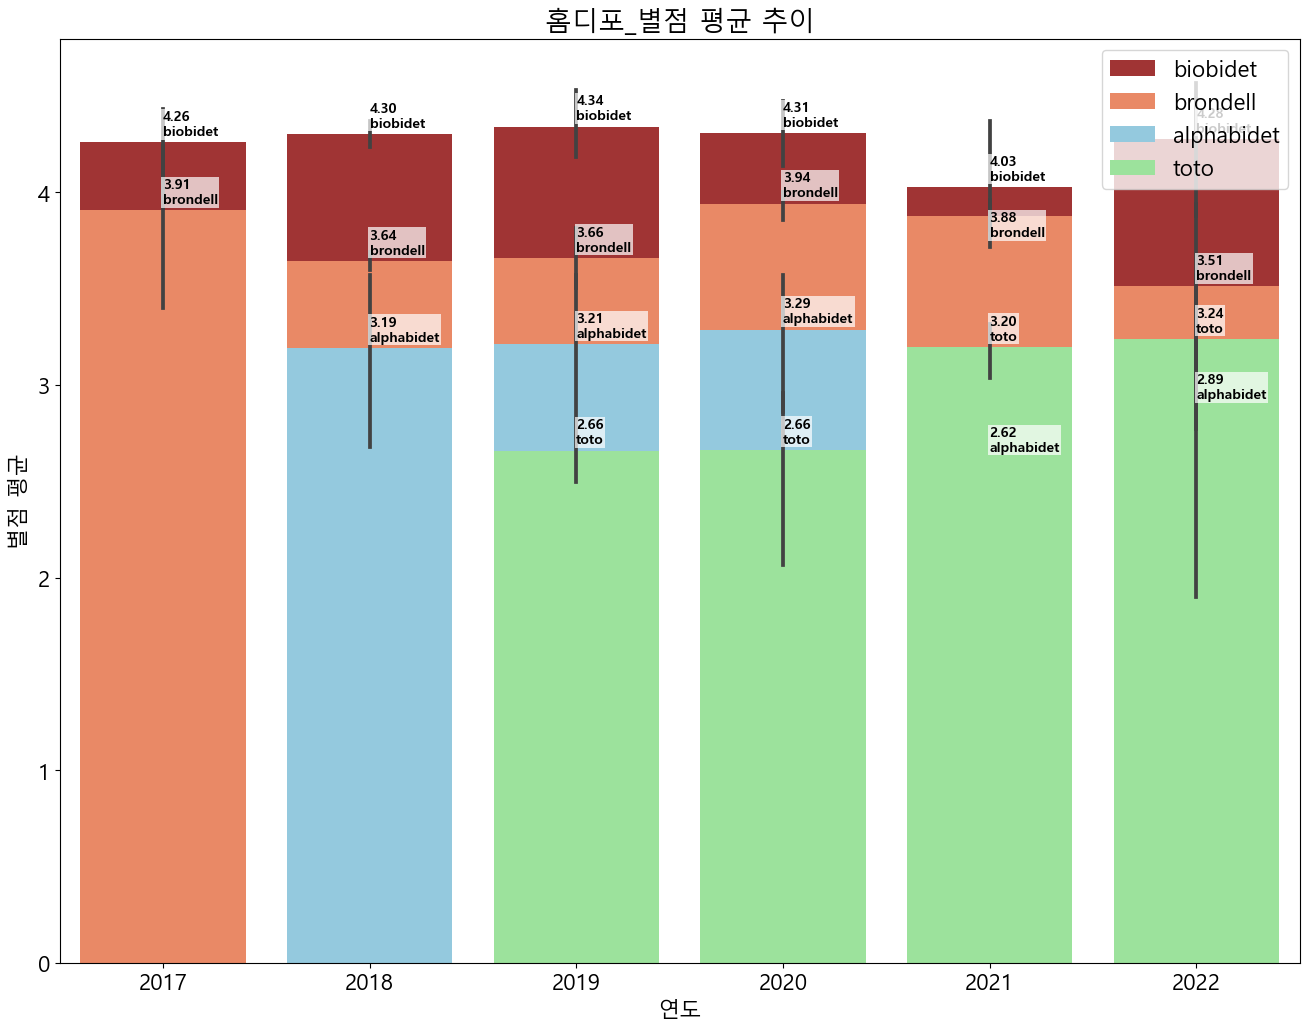

In [510]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r55['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r55, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('홈디포_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 로우스

In [511]:
r7 = r1[r1['채널명']=='lowes']
r7

,연도,분기,채널명,별점
76,2017,2017Q1,lowes,3.01
81,2017,2017Q2,lowes,3.43
86,2017,2017Q3,lowes,3.61
92,2017,2017Q4,lowes,2.61
97,2018,2018Q1,lowes,3.25
102,2018,2018Q2,lowes,3.20
107,2018,2018Q3,lowes,2.97
113,2018,2018Q4,lowes,3.12
118,2019,2019Q1,lowes,3.19
123,2019,2019Q2,lowes,3.09


In [512]:
r7 = r7[['분기', '별점']]
r7

,분기,별점
76,2017Q1,3.01
81,2017Q2,3.43
86,2017Q3,3.61
92,2017Q4,2.61
97,2018Q1,3.25
102,2018Q2,3.20
107,2018Q3,2.97
113,2018Q4,3.12
118,2019Q1,3.19
123,2019Q2,3.09


#### 그래프

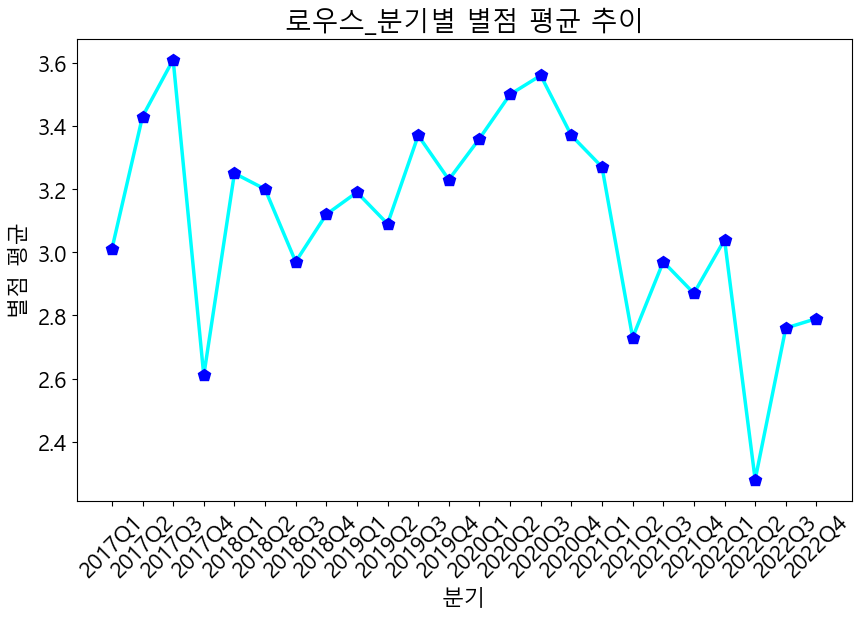

In [513]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r7['분기'], r7['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('로우스_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [514]:
r77 = combined_ratings[combined_ratings['채널명']=='lowes']
r77

,회사명,제품명,작성일,별점,채널명,연도,분기
2812,brondell,S1400,2018-11-12,3.395352,lowes,2018,2018Q4
2813,brondell,S1400,2020-04-29,4.244190,lowes,2020,2020Q2
2814,brondell,S1400,2020-11-24,4.244190,lowes,2020,2020Q4
2815,brondell,S1400,2021-02-12,3.395352,lowes,2021,2021Q1
2816,brondell,S1400,2021-08-20,2.546514,lowes,2021,2021Q3
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [515]:
r77 = r77.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r77

,연도,분기,회사명,별점
0,2012,2012Q1,brondell,1.820308
1,2014,2014Q1,brondell,3.033846
2,2014,2014Q3,brondell,2.983282
3,2014,2014Q4,brondell,3.033846
4,2015,2015Q1,biobidet,3.497452
...,...,...,...,...
91,2022,2022Q3,vovo,2.475932
92,2022,2022Q4,biobidet,3.497452
93,2022,2022Q4,brondell,3.214599
94,2022,2022Q4,kohler,1.822231


In [516]:
r77 = r77[r77['연도'].astype(str).astype(int)>=2017]
r77['연도'] = r77['연도'].astype(str)
r77['분기'] = r77['분기'].astype(str)
r77['별점'] = r77['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r77

C:\Users\user\AppData\Local\Temp\ipykernel_2648\3852729673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r77['연도'] = r77['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\3852729673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r77['분기'] = r77['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\3852729673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,연도,분기,회사명,별점
18,2017,2017Q1,biobidet,3.11
19,2017,2017Q1,brondell,2.69
20,2017,2017Q2,biobidet,3.16
21,2017,2017Q2,brondell,3.67
22,2017,2017Q3,a_s,2.35
...,...,...,...,...
91,2022,2022Q3,vovo,2.48
92,2022,2022Q4,biobidet,3.50
93,2022,2022Q4,brondell,3.21
94,2022,2022Q4,kohler,1.82


#### 막대그래프

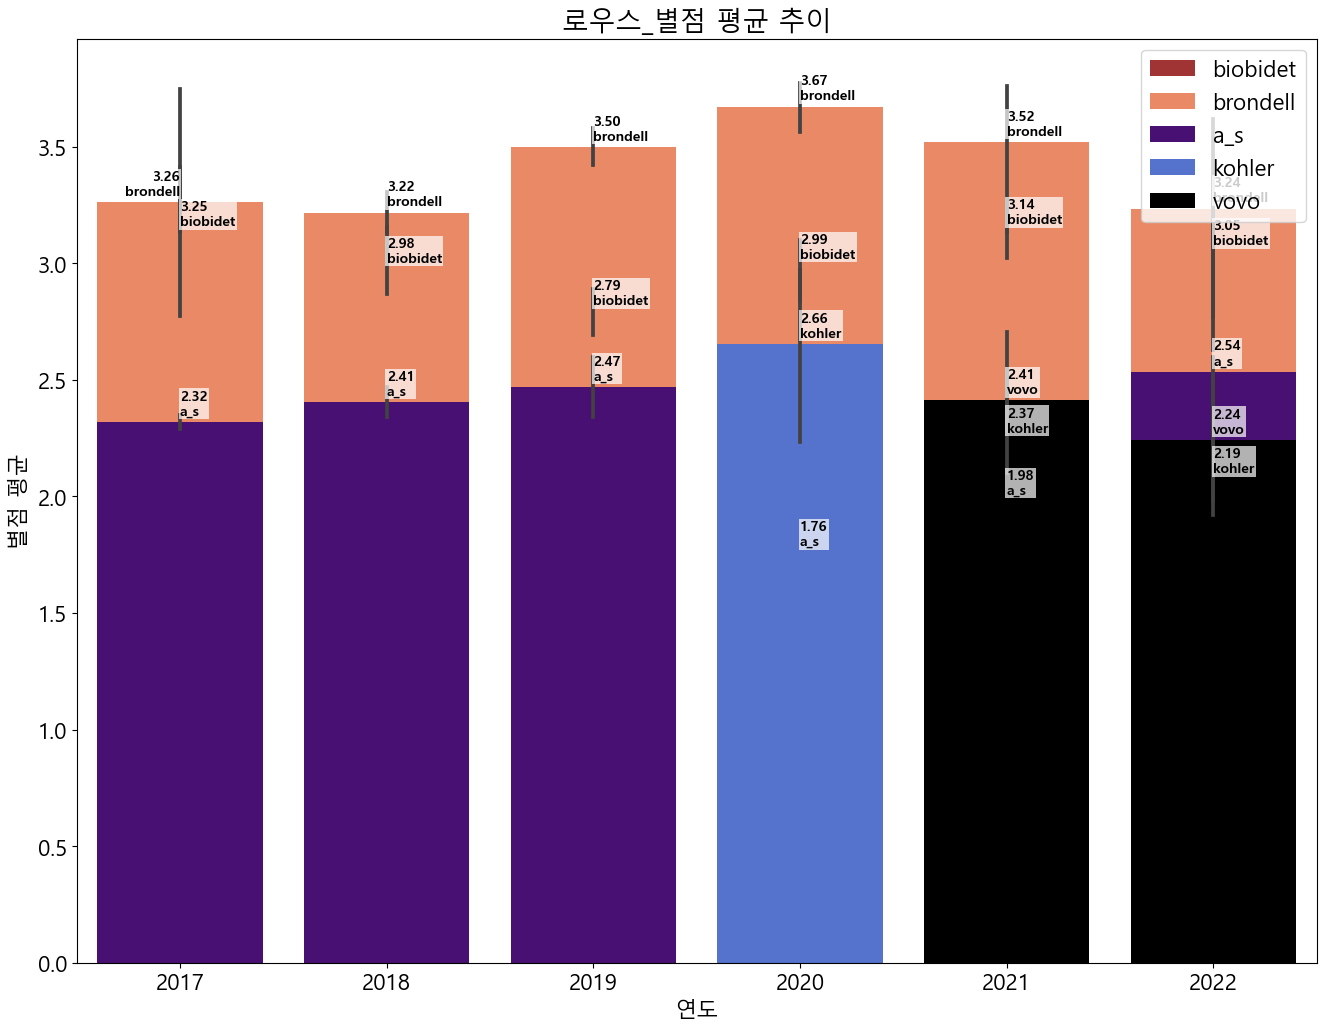

In [517]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r77['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r77, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('로우스_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

### 월마트

In [518]:
r8 = r1[r1['채널명']=='walmart']
r8

,연도,분기,채널명,별점
77,2017,2017Q1,walmart,3.45
82,2017,2017Q2,walmart,3.58
87,2017,2017Q3,walmart,3.74
93,2017,2017Q4,walmart,3.45
98,2018,2018Q1,walmart,3.79
103,2018,2018Q2,walmart,3.98
108,2018,2018Q3,walmart,3.64
114,2018,2018Q4,walmart,3.76
119,2019,2019Q1,walmart,3.92
124,2019,2019Q2,walmart,3.42


In [519]:
r8 = r8[['분기', '별점']]
r8

,분기,별점
77,2017Q1,3.45
82,2017Q2,3.58
87,2017Q3,3.74
93,2017Q4,3.45
98,2018Q1,3.79
103,2018Q2,3.98
108,2018Q3,3.64
114,2018Q4,3.76
119,2019Q1,3.92
124,2019Q2,3.42


#### 그래프

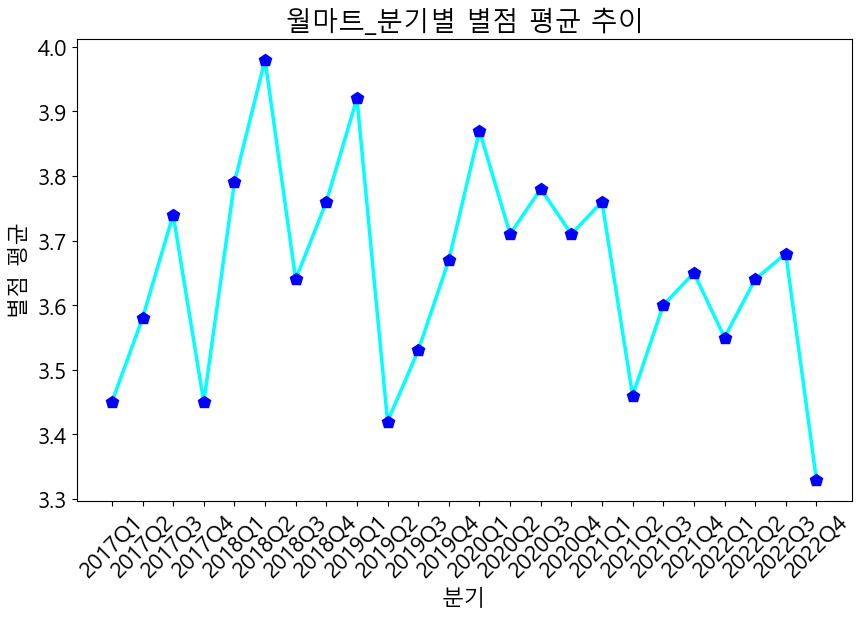

In [520]:
plt.figure(figsize=(10,6))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='리뷰수', marker='o')
plt.plot(r8['분기'], r8['별점'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('월마트_분기별 별점 평균 추이')  # 그래프 제목 설정
plt.xlabel('분기')  # x축 레이블 설정
plt.ylabel('별점 평균')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [521]:
r88 = combined_ratings[combined_ratings['채널명']=='walmart']
r88

,회사명,제품명,작성일,별점,채널명,연도,분기
1610,brondell,S1400,2018-01-12,4.244190,walmart,2018,2018Q1
1611,brondell,S1400,2020-01-12,4.244190,walmart,2020,2020Q1
1612,brondell,S1400,2020-01-13,4.244190,walmart,2020,2020Q1
1613,brondell,S1400,2018-01-14,4.244190,walmart,2018,2018Q1
1614,brondell,S1400,2021-01-14,4.244190,walmart,2021,2021Q1
...,...,...,...,...,...,...,...
27343,brondell,EM617,2021-07-24,2.086382,walmart,2021,2021Q3
27344,brondell,EM617,2021-07-26,2.086382,walmart,2021,2021Q3
27345,brondell,EM617,2021-07-30,1.669106,walmart,2021,2021Q3
27346,brondell,EM617,2021-08-11,2.086382,walmart,2021,2021Q3


In [522]:
r88 = r88.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()
r88

,연도,분기,회사명,별점
0,2015,2015Q1,biobidet,2.855054
1,2015,2015Q2,biobidet,3.118838
2,2015,2015Q3,biobidet,2.957036
3,2015,2015Q4,biobidet,3.959538
4,2016,2016Q1,biobidet,4.260731
5,2016,2016Q3,biobidet,3.291297
6,2016,2016Q4,biobidet,3.537569
7,2017,2017Q1,biobidet,3.453398
8,2017,2017Q2,biobidet,3.475214
9,2017,2017Q2,brondell,4.244190


In [523]:
r88 = r88[r88['연도'].astype(str).astype(int)>=2017]
r88['연도'] = r88['연도'].astype(str)
r88['분기'] = r88['분기'].astype(str)
r88['별점'] = r88['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
r88

C:\Users\user\AppData\Local\Temp\ipykernel_2648\4132920351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r88['연도'] = r88['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\4132920351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r88['분기'] = r88['분기'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_2648\4132920351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,연도,분기,회사명,별점
7,2017,2017Q1,biobidet,3.45
8,2017,2017Q2,biobidet,3.48
9,2017,2017Q2,brondell,4.24
10,2017,2017Q3,biobidet,3.51
11,2017,2017Q3,brondell,4.10
12,2017,2017Q4,biobidet,3.39
13,2017,2017Q4,brondell,4.24
14,2018,2018Q1,biobidet,3.58
15,2018,2018Q1,brondell,4.16
16,2018,2018Q2,biobidet,3.96


#### 막대그래프

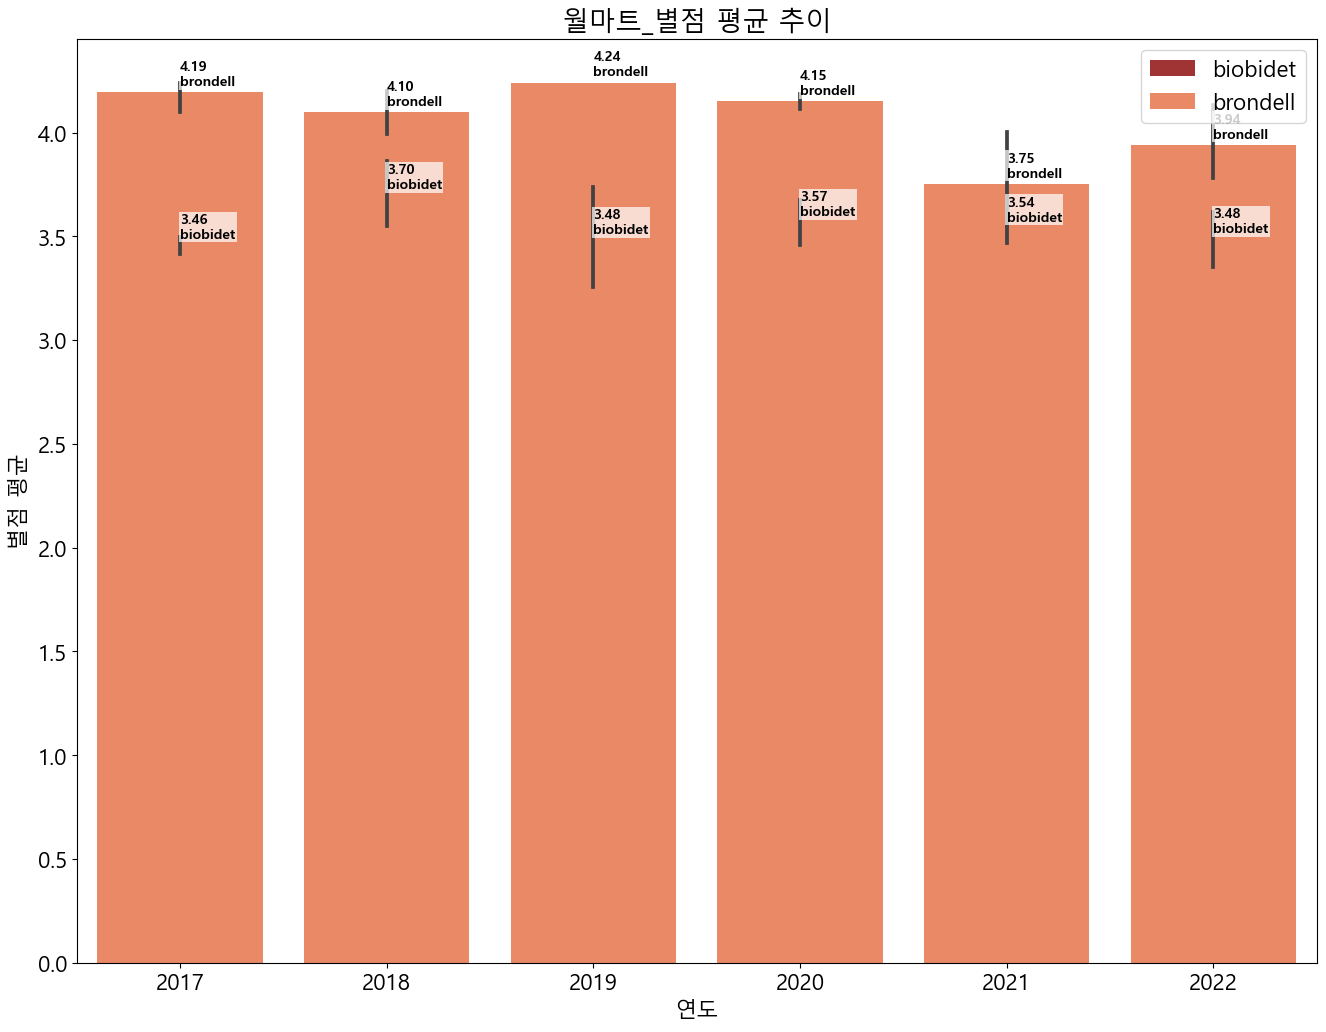

In [524]:
plt.figure(figsize=(16, 12))
palette = sns.color_palette([colors[x] for x in r88['회사명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=r88, palette=palette, dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('월마트_별점 평균 추이')
plt.legend(loc='upper right') # 범례의 외곽선 표시 여부 (frameon=False)
plt.show()

## 브랜드별

In [525]:
b = combined_ratings.groupby(['연도', '분기', '회사명'])[['별점']].mean().reset_index()[['연도', '분기', '회사명', '별점']]
b

,연도,분기,회사명,별점
0,2009,2009Q2,biobidet,4.565069
1,2009,2009Q3,biobidet,1.826028
2,2010,2010Q1,biobidet,3.956393
3,2010,2010Q2,biobidet,4.565069
4,2010,2010Q4,brondell,4.238251
...,...,...,...,...
235,2022,2022Q4,kohler,1.760998
236,2022,2022Q4,ovedecors,3.295273
237,2022,2022Q4,toto,2.993208
238,2022,2022Q4,tushy,3.115534


In [526]:
bb = b[b['연도'].astype(str).astype(int)>=2017]
bb

,연도,분기,회사명,별점
66,2017,2017Q1,alphabidet,3.566886
67,2017,2017Q1,biobidet,3.725398
68,2017,2017Q1,brondell,2.687121
69,2017,2017Q1,kohler,3.037052
70,2017,2017Q2,alphabidet,3.281536
...,...,...,...,...
235,2022,2022Q4,kohler,1.760998
236,2022,2022Q4,ovedecors,3.295273
237,2022,2022Q4,toto,2.993208
238,2022,2022Q4,tushy,3.115534


In [527]:
bb = bb.groupby(['분기', '회사명'])[['별점']].mean().reset_index()
bb

,분기,회사명,별점
0,2017Q1,alphabidet,3.566886
1,2017Q1,biobidet,3.725398
2,2017Q1,brondell,2.687121
3,2017Q1,kohler,3.037052
4,2017Q2,alphabidet,3.281536
...,...,...,...
169,2022Q4,kohler,1.760998
170,2022Q4,ovedecors,3.295273
171,2022Q4,toto,2.993208
172,2022Q4,tushy,3.115534


In [528]:
bb['분기'] = bb['분기'].astype(str)
bb['별점'] = bb['별점'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
bb

,분기,회사명,별점
0,2017Q1,alphabidet,3.57
1,2017Q1,biobidet,3.73
2,2017Q1,brondell,2.69
3,2017Q1,kohler,3.04
4,2017Q2,alphabidet,3.28
...,...,...,...
169,2022Q4,kohler,1.76
170,2022Q4,ovedecors,3.30
171,2022Q4,toto,2.99
172,2022Q4,tushy,3.12


#### 그래프

In [1]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = bb.pivot_table(values='별점', index='분기', columns='회사명')

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('브랜드별 별점 가중평균 추이')
ax.set_xlabel('분기')
ax.set_ylabel('별점 평균')
ax.legend(fontsize=10)  # 범례 크기 조정
# x축 눈금 간격 조절
ax.xaxis.set_major_locator(plt.MaxNLocator(len(df_pivot.index)))

# x축 눈금 레이블 회전하기
plt.xticks(ticks=range(len(df_pivot.index)), labels=df_pivot.index, fontsize=10, rotation=90, ha='right')
plt.show()

NameError: name 'plt' is not defined

In [530]:
br = combined_ratings.groupby(['연도', '회사명'])[['별점']].mean().reset_index()[['연도', '회사명', '별점']]
br = br[br['연도'].astype(str).astype(int)>=2017]
br

,연도,회사명,별점
23,2017,a_s,2.290169
24,2017,alphabidet,3.261153
25,2017,biobidet,3.857686
26,2017,brondell,3.955357
27,2017,kohler,2.548697
28,2017,toto,2.365990
29,2018,a_s,2.382350
30,2018,alphabidet,3.172652
31,2018,biobidet,4.313035
32,2018,brondell,3.861311


#### 막대그래프

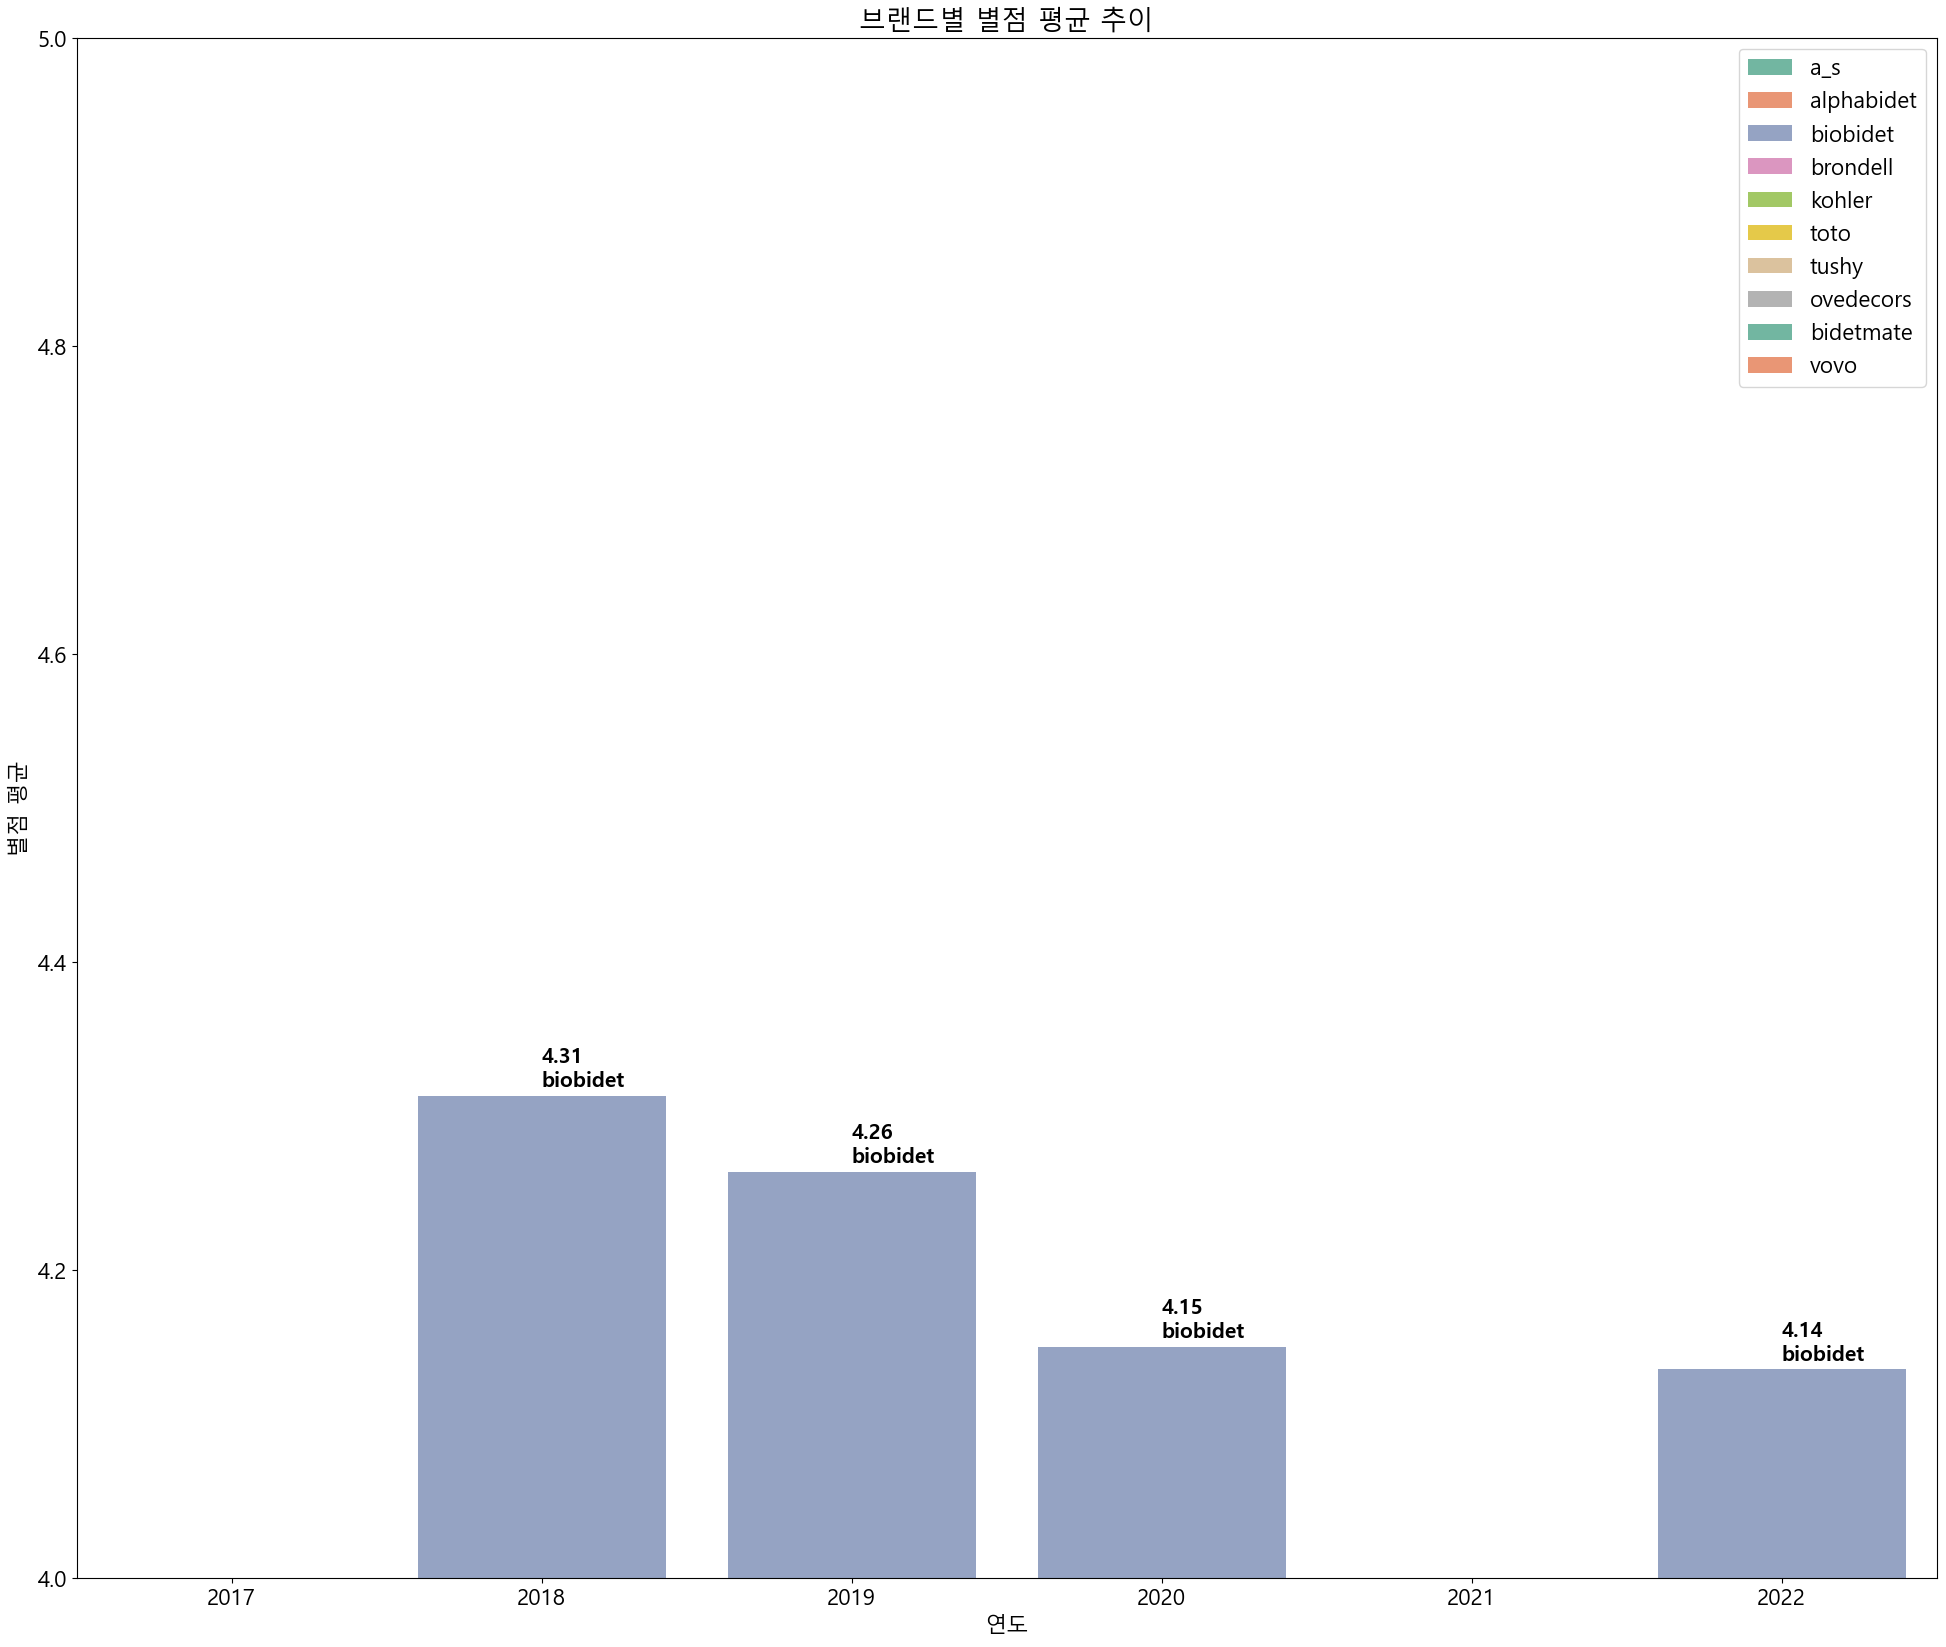

In [531]:
plt.figure(figsize=(24,20))
ax = sns.barplot(x='연도', y='별점', hue='회사명', data=br, palette='Set2', dodge=False)

# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 15, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)


plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('브랜드별 별점 평균 추이')
plt.legend(loc='upper right')
plt.ylim([4, 5])
plt.show()
   

### alphabidet

In [532]:
br1 = combined_ratings[combined_ratings['회사명']=='alphabidet']
br1

,회사명,제품명,작성일,별점,채널명,연도,분기
401,alphabidet,Alpha JX,2018-06-25,3.566886,hd,2018,2018Q2
402,alphabidet,Alpha JX,2018-06-27,2.853509,hd,2018,2018Q2
403,alphabidet,Alpha JX,2018-06-30,3.566886,hd,2018,2018Q2
404,alphabidet,Alpha JX,2018-07-01,3.566886,hd,2018,2018Q3
405,alphabidet,Alpha JX,2018-07-01,3.566886,hd,2018,2018Q3
...,...,...,...,...,...,...,...
823,alphabidet,Alpha JX,2016-02-17,3.566886,amazon,2016,2016Q1
824,alphabidet,Alpha JX,2016-01-01,1.426755,amazon,2016,2016Q1
825,alphabidet,Alpha JX,2015-12-12,3.566886,amazon,2015,2015Q4
826,alphabidet,Alpha JX,2015-10-15,3.566886,amazon,2015,2015Q4


In [533]:
br1 = combined_ratings[combined_ratings['회사명']=='alphabidet']
br1 = br1.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br1 = br1[br1['연도'].astype(str).astype(int)>=2017]
br1

,연도,채널명,별점
2,2017,amazon,3.261153
3,2018,amazon,3.101640
4,2018,hd,3.281536
5,2019,amazon,3.110325
6,2019,hd,3.388542
7,2020,amazon,3.232965
8,2020,hd,3.242624
9,2021,amazon,3.179181
10,2021,hd,2.615717
11,2022,amazon,3.101640


#### 막대그래프

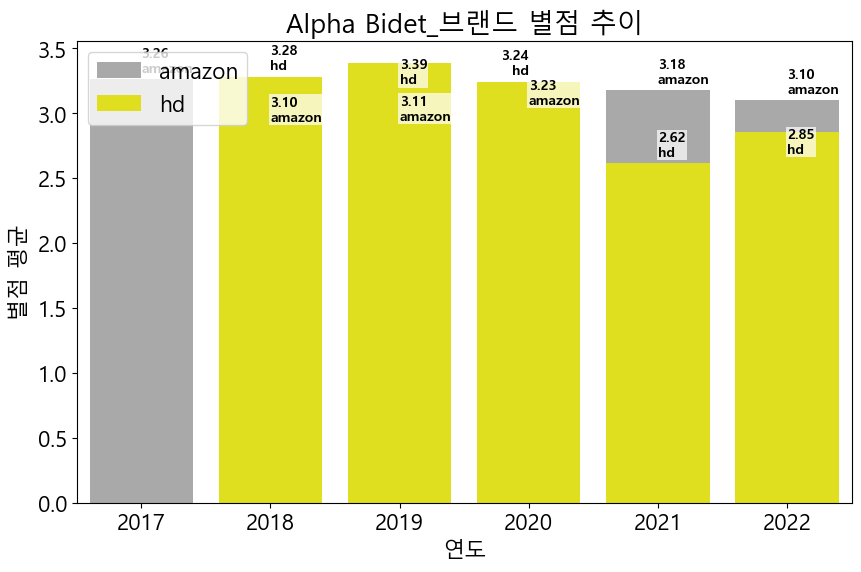

In [534]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br1['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br1, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Alpha Bidet_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### american standard

In [535]:
br2 = combined_ratings[combined_ratings['회사명']=='a_s']
br2

,회사명,제품명,작성일,별점,채널명,연도,분기
30713,a_s,Advanced Clean 2.0 SpaLet,2017-09-26,1.978612,build.com,2017,2017Q3
30714,a_s,Advanced Clean 2.0 SpaLet,2017-09-30,2.473265,build.com,2017,2017Q3
30715,a_s,Advanced Clean 2.0 SpaLet,2017-09-30,2.473265,build.com,2017,2017Q3
30716,a_s,Advanced Clean 2.0 SpaLet,2017-09-30,2.473265,build.com,2017,2017Q3
30717,a_s,Advanced Clean 2.0 SpaLet,2017-10-02,2.473265,build.com,2017,2017Q4
...,...,...,...,...,...,...,...
30883,a_s,AquaWash 2.0 SpaLet,2020-04-22,2.322394,build.com,2020,2020Q2
30884,a_s,AquaWash 2.0 SpaLet,2020-10-28,2.322394,build.com,2020,2020Q4
30885,a_s,AquaWash 2.0 SpaLet,2020-11-27,2.322394,build.com,2020,2020Q4
30886,a_s,AquaWash 2.0 SpaLet,2020-12-17,2.322394,build.com,2020,2020Q4


In [536]:
br2 = combined_ratings[combined_ratings['회사명']=='a_s']
br2 = br2.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br2 = br2[br2['연도'].astype(str).astype(int)>=2017]
br2

,연도,채널명,별점
0,2017,build.com,2.287936
1,2017,lowes,2.292349
2,2018,build.com,2.382350
3,2018,lowes,2.382350
4,2019,build.com,2.179843
5,2019,lowes,2.423444
6,2020,build.com,2.059968
7,2020,lowes,1.755942
8,2021,build.com,2.260864
9,2021,lowes,1.978612


#### 막대그래프

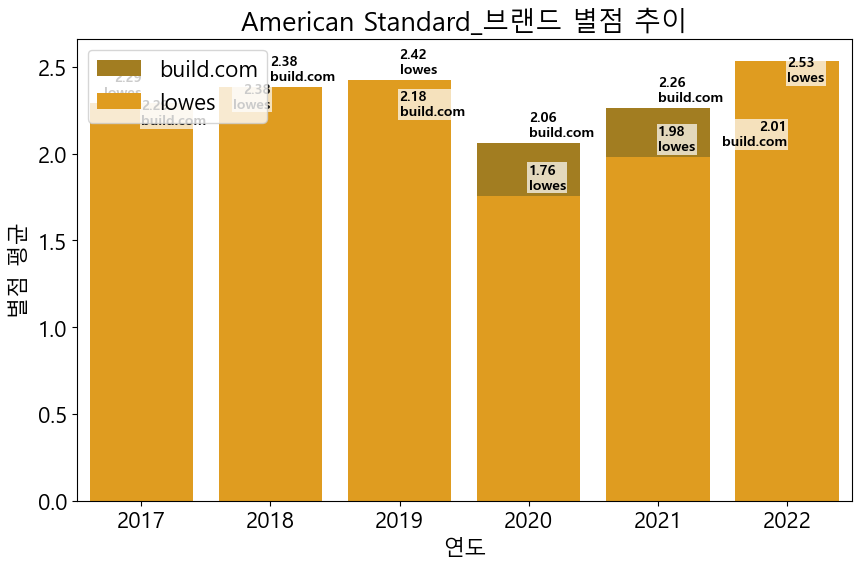

In [537]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br2['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br2, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('American Standard_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### bidetmate

In [538]:
br3 = combined_ratings[combined_ratings['회사명']=='bidetmate']
br3

,회사명,제품명,작성일,별점,채널명,연도,분기
29605,bidetmate,3000 Series,2022-12-04,3.331195,amazon,2022,2022Q4
29606,bidetmate,3000 Series,2022-12-03,3.331195,amazon,2022,2022Q4
29607,bidetmate,3000 Series,2022-11-27,3.331195,amazon,2022,2022Q4
29608,bidetmate,3000 Series,2022-11-15,0.666239,amazon,2022,2022Q4
29609,bidetmate,3000 Series,2022-11-12,3.331195,amazon,2022,2022Q4
...,...,...,...,...,...,...,...
30479,bidetmate,2000 Series,2022-03-24,2.714970,amazon,2022,2022Q1
30480,bidetmate,2000 Series,2022-03-23,2.714970,amazon,2022,2022Q1
30481,bidetmate,2000 Series,2022-03-17,2.714970,amazon,2022,2022Q1
30482,bidetmate,2000 Series,2022-03-15,2.714970,amazon,2022,2022Q1


In [539]:
br3 = combined_ratings[combined_ratings['회사명']=='bidetmate']
br3 = br3.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br3 = br3[br3['연도'].astype(str).astype(int)>=2017]
br3

,연도,채널명,별점
0,2020,amazon,2.898140
1,2021,amazon,2.844551
2,2022,amazon,2.380484


#### 막대그래프

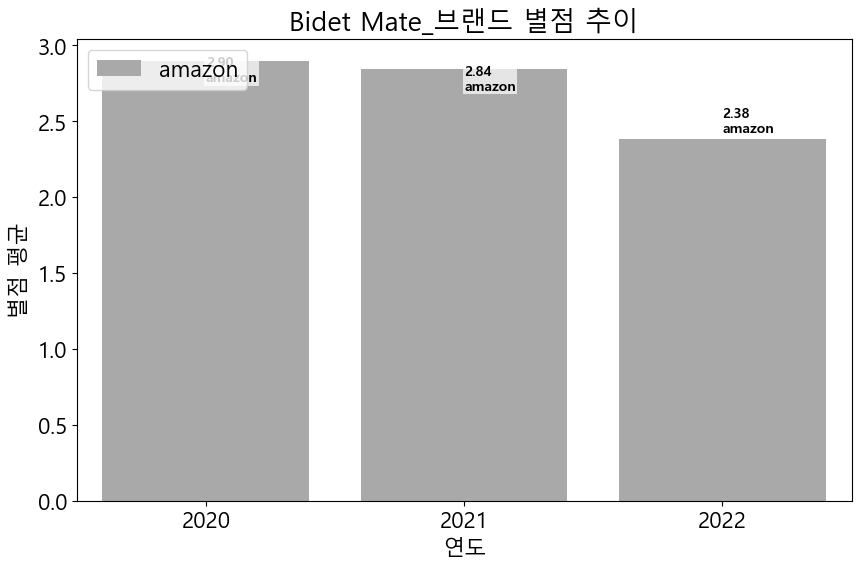

In [540]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br3['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br3, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Bidet Mate_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### biobidet

In [541]:
br4 = combined_ratings[combined_ratings['회사명']=='biobidet']
br4

,회사명,제품명,작성일,별점,채널명,연도,분기
3109,biobidet,BB600,2012-08-01,4.565069,hd,2012,2012Q3
3110,biobidet,BB600,2013-03-06,4.565069,hd,2013,2013Q1
3111,biobidet,BB600,2013-04-23,0.913014,hd,2013,2013Q2
3112,biobidet,BB600,2013-07-14,4.565069,hd,2013,2013Q3
3113,biobidet,BB600,2014-04-09,4.565069,hd,2014,2014Q2
...,...,...,...,...,...,...,...
30970,biobidet,BB A8,2022-01-24,2.597868,lowes,2022,2022Q1
30971,biobidet,BB A8,2020-04-27,2.597868,lowes,2020,2020Q2
30972,biobidet,BB A8,2016-10-13,2.597868,lowes,2016,2016Q4
30973,biobidet,BB A8,2020-09-20,1.558721,lowes,2020,2020Q3


In [542]:
br4 = combined_ratings[combined_ratings['회사명']=='biobidet']
br4 = br4.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br4 = br4[br4['연도'].astype(str).astype(int)>=2017]
br4

,연도,채널명,별점
24,2017,amazon,3.596375
25,2017,build.com,3.874675
26,2017,costco,4.231987
27,2017,hd,4.252722
28,2017,lowes,3.234888
29,2017,walmart,3.461040
30,2018,amazon,3.785875
31,2018,build.com,4.005104
32,2018,costco,4.430204
33,2018,hd,4.302421


#### 막대그래프

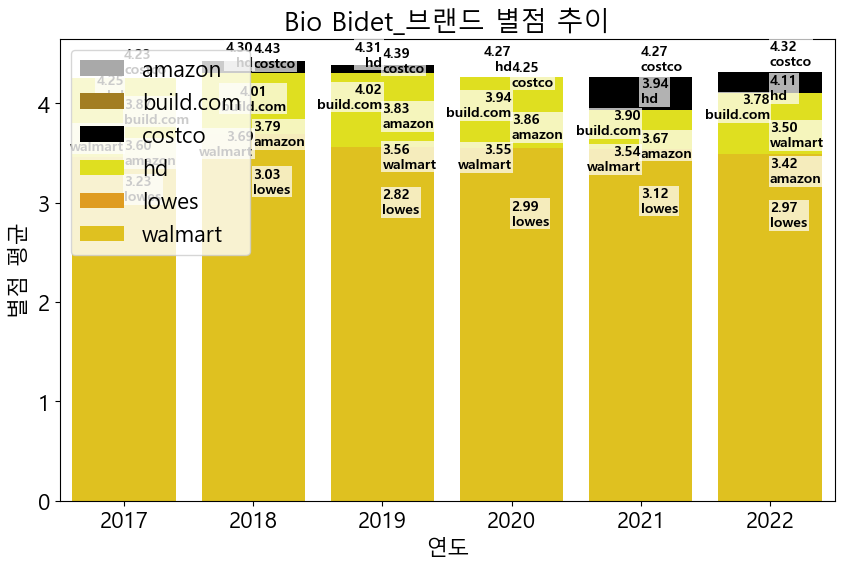

In [543]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br4['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br4, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Bio Bidet_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### brondell

In [544]:
br5 = combined_ratings[combined_ratings['회사명']=='brondell']
br5

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [545]:
br5 = combined_ratings[combined_ratings['회사명']=='brondell']
br5 = br5.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br4 = br5[br5['연도'].astype(str).astype(int)>=2017]
br5

,연도,채널명,별점
0,2010,costco,4.238251
1,2011,costco,4.163896
2,2012,costco,4.461317
3,2012,lowes,1.820308
4,2013,costco,4.461317
5,2014,costco,3.301375
6,2014,lowes,2.987172
7,2015,costco,3.726512
8,2015,lowes,3.033846
9,2016,costco,3.946550


#### 막대그래프

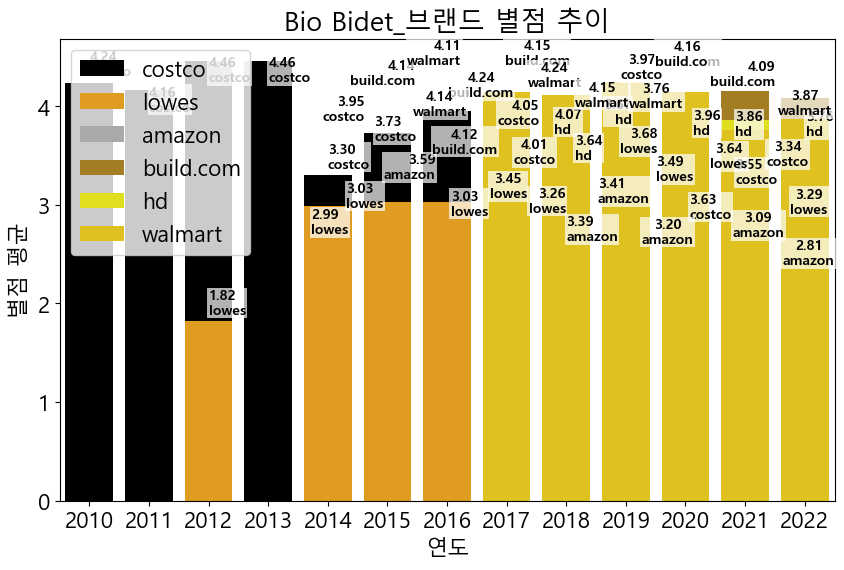

In [546]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br5['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br5, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Bio Bidet_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### kohler

In [547]:
br6 = combined_ratings[combined_ratings['회사명']=='kohler']
br6

,회사명,제품명,작성일,별점,채널명,연도,분기
23895,kohler,Novita,2022-10-01,0.636173,costco,2022,2022Q4
23896,kohler,Novita,2021-11-30,2.544692,costco,2021,2021Q4
23897,kohler,Novita,2022-06-03,3.180865,costco,2022,2022Q2
23898,kohler,Novita,2022-04-04,3.180865,costco,2022,2022Q2
23899,kohler,Novita,2022-01-04,1.272346,costco,2022,2022Q1
...,...,...,...,...,...,...,...
30708,kohler,C3-455,2022-08-06,0.458860,build.com,2022,2022Q3
30709,kohler,C3-455,2022-08-31,2.294298,build.com,2022,2022Q3
30710,kohler,C3-455,2022-09-04,2.294298,build.com,2022,2022Q3
30711,kohler,C3-455,2022-11-30,2.294298,build.com,2022,2022Q4


In [548]:
br6 = combined_ratings[combined_ratings['회사명']=='kohler']
br6 = br6.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br6 = br6[br6['연도'].astype(str).astype(int)>=2017]
br6

,연도,채널명,별점
2,2017,build.com,2.548697
3,2018,build.com,2.602771
4,2019,build.com,2.218431
5,2020,build.com,2.489311
6,2020,lowes,2.587937
7,2021,build.com,2.300153
8,2021,costco,2.438663
9,2021,lowes,2.407197
10,2022,build.com,2.188699
11,2022,costco,2.609608


#### 막대그래프

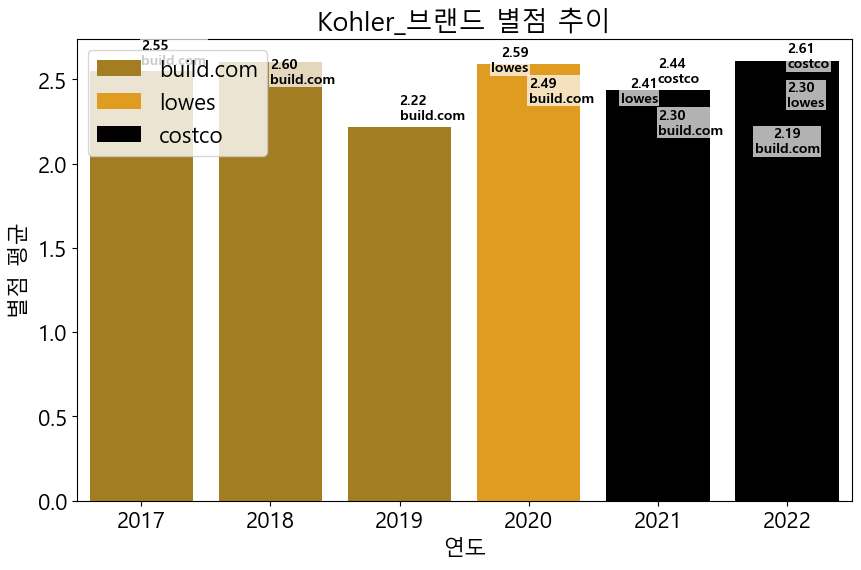

In [549]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br6['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br6, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Kohler_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### ovedecors

In [550]:
br7 = combined_ratings[combined_ratings['회사명']=='ovedecors']
br7

,회사명,제품명,작성일,별점,채널명,연도,분기
24025,ovedecors,Irenne,2021-11-30,3.720470,costco,2021,2021Q4
24026,ovedecors,Irenne,2022-08-02,2.976376,costco,2022,2022Q3
24027,ovedecors,Irenne,2021-11-30,3.720470,costco,2021,2021Q4
24028,ovedecors,Irenne,2020-11-30,3.720470,costco,2020,2020Q4
24029,ovedecors,Irenne,2019-12-01,3.720470,costco,2019,2019Q4
...,...,...,...,...,...,...,...
24466,ovedecors,Irenne,2022-02-03,3.720470,costco,2022,2022Q1
24467,ovedecors,Irenne,2022-06-03,3.720470,costco,2022,2022Q2
24468,ovedecors,Irenne,2022-06-03,2.976376,costco,2022,2022Q2
24469,ovedecors,Irenne,2020-11-30,3.720470,costco,2020,2020Q4


In [551]:
br7 = combined_ratings[combined_ratings['회사명']=='ovedecors']
br7 = br7.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br7 = br7[br7['연도'].astype(str).astype(int)>=2017]
br7

,연도,채널명,별점
0,2019,costco,3.041484
1,2020,costco,3.163394
2,2021,costco,3.093096
3,2022,costco,3.324264


#### 막대그래프

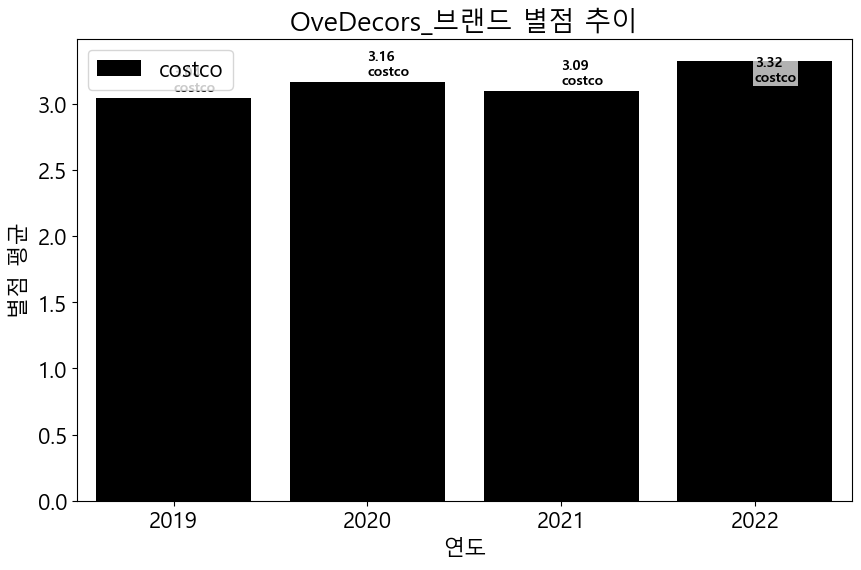

In [552]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br7['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br7, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('OveDecors_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### toto

In [553]:
br8 = combined_ratings[combined_ratings['회사명']=='toto']
br8

,회사명,제품명,작성일,별점,채널명,연도,분기
828,toto,SW3074 C2,2021-05-28,3.304906,hd,2021,2021Q2
829,toto,SW3074 C2,2021-05-31,2.643925,hd,2021,2021Q2
830,toto,SW3074 C2,2021-06-01,3.304906,hd,2021,2021Q2
831,toto,SW3074 C2,2021-06-02,3.304906,hd,2021,2021Q2
832,toto,SW3074 C2,2021-06-04,3.304906,hd,2021,2021Q2
...,...,...,...,...,...,...,...
30894,toto,SW3046 S500,2022-01-21,1.780860,build.com,2022,2022Q1
30895,toto,SW3046 S500,2022-04-10,1.780860,build.com,2022,2022Q2
30896,toto,SW3046 S500,2022-05-04,1.780860,build.com,2022,2022Q2
30897,toto,SW3046 S500,2022-06-17,1.780860,build.com,2022,2022Q2


In [554]:
br8 = combined_ratings[combined_ratings['회사명']=='toto']
br8 = br8.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br8 = br8[br8['연도'].astype(str).astype(int)>=2017]
br8

,연도,채널명,별점
4,2017,amazon,2.365990
5,2018,amazon,2.983990
6,2019,amazon,3.186156
7,2019,hd,2.661738
8,2020,amazon,3.116534
9,2020,build.com,1.828497
10,2020,hd,2.563156
11,2021,amazon,3.120171
12,2021,build.com,3.104230
13,2021,hd,3.256357


#### 막대그래프

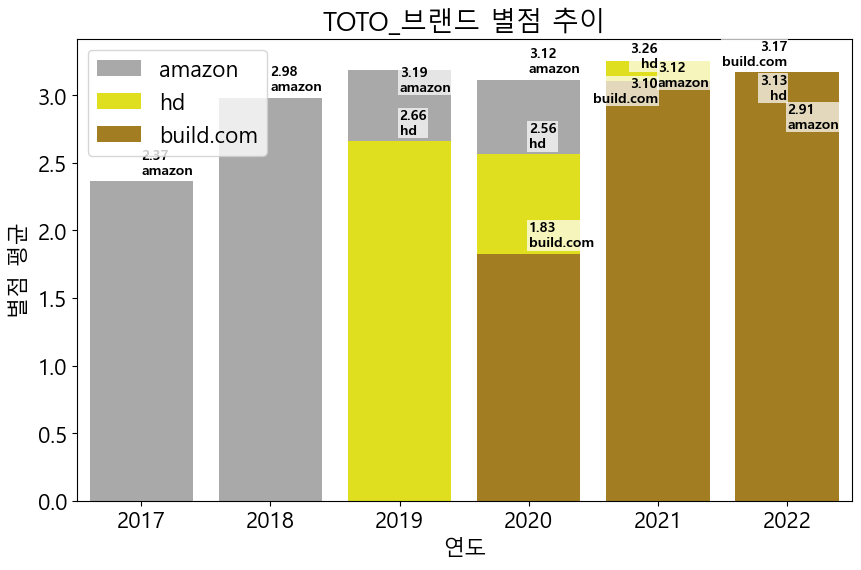

In [555]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br8['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br8, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('TOTO_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### tushy

In [556]:
br9 = combined_ratings[combined_ratings['회사명']=='tushy']
br9

,회사명,제품명,작성일,별점,채널명,연도,분기
27348,tushy,Basic 2.0,2022-12-06,4.322129,amazon,2022,2022Q4
27349,tushy,Basic 2.0,2022-12-06,4.322129,amazon,2022,2022Q4
27350,tushy,Basic 2.0,2022-12-05,0.864426,amazon,2022,2022Q4
27351,tushy,Basic 2.0,2022-12-05,4.322129,amazon,2022,2022Q4
27352,tushy,Basic 2.0,2022-12-04,0.864426,amazon,2022,2022Q4
...,...,...,...,...,...,...,...
29188,tushy,Classic 3.0,2021-04-26,0.756290,amazon,2021,2021Q2
29189,tushy,Classic 3.0,2021-04-21,3.781449,amazon,2021,2021Q2
29190,tushy,Classic 3.0,2021-04-11,3.025159,amazon,2021,2021Q2
29191,tushy,Classic 3.0,2021-03-27,3.781449,amazon,2021,2021Q1


In [557]:
br9 = combined_ratings[combined_ratings['회사명']=='tushy']
br9 = br9.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br9 = br9[br9['연도'].astype(str).astype(int)>=2017]
br9

,연도,채널명,별점
0,2018,amazon,3.906540
1,2019,amazon,3.760593
2,2020,amazon,3.642937
3,2021,amazon,3.495013
4,2022,amazon,3.331447


#### 막대그래프

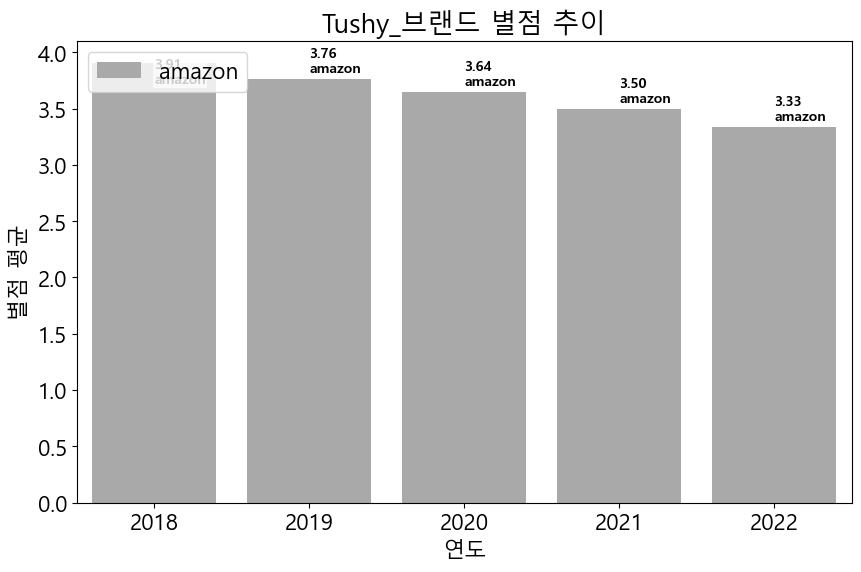

In [558]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br9['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br9, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('Tushy_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

### vovo

In [559]:
br10 = combined_ratings[combined_ratings['회사명']=='vovo']
br10

,회사명,제품명,작성일,별점,채널명,연도,분기
30975,vovo,VB-6100SR,2021-04-13,2.125271,lowes,2021,2021Q2
30976,vovo,VB-6100SR,2021-04-23,2.656588,lowes,2021,2021Q2
30977,vovo,VB-6100SR,2021-06-24,2.656588,lowes,2021,2021Q2
30978,vovo,VB-6100SR,2021-05-27,2.125271,lowes,2021,2021Q2
30979,vovo,VB-6100SR,2021-04-03,2.656588,lowes,2021,2021Q2
...,...,...,...,...,...,...,...
31114,vovo,VB-6000SE,2022-05-23,1.810406,lowes,2022,2022Q2
31115,vovo,VB-6000SE,2021-07-23,1.448325,lowes,2021,2021Q3
31116,vovo,VB-6000SE,2022-05-03,1.810406,lowes,2022,2022Q2
31117,vovo,VB-6000SE,2021-06-09,1.810406,lowes,2021,2021Q2


In [560]:
br10 = combined_ratings[combined_ratings['회사명']=='vovo']
br10 = br10.groupby(['연도', '채널명'])[['별점']].mean().reset_index()[['연도', '채널명', '별점']]
br10 = br10[br10['연도'].astype(str).astype(int)>=2017]
br10

,연도,채널명,별점
0,2021,lowes,2.352910
1,2022,lowes,2.293504


#### 막대그래프

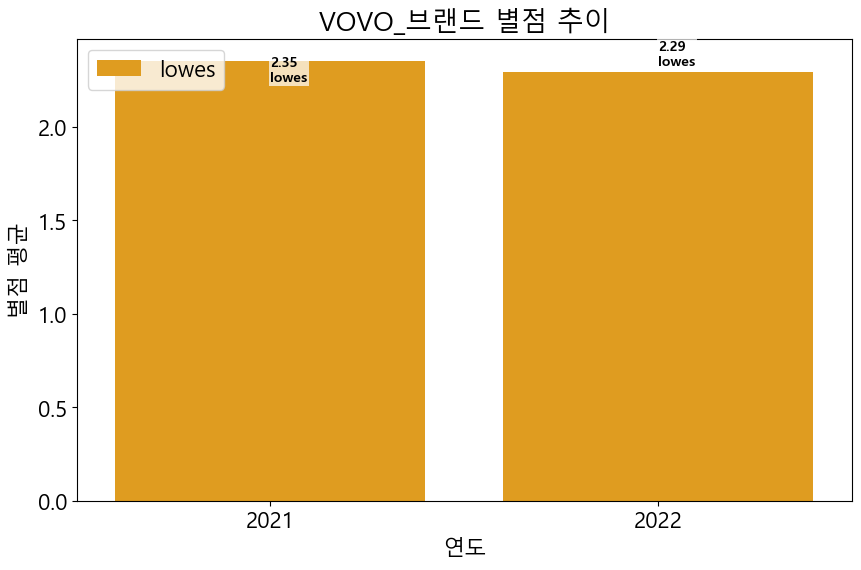

In [561]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette([channel[x] for x in br10['채널명'].unique()])
ax = sns.barplot(x='연도', y='별점', hue='채널명', data=br10, palette=palette, dodge=False)
            
# 평균값과 채널명 표시하기
annotations = []
for container in ax.containers:
    for p in container.patches:
        if container.get_label() != '_nolegend_':
            val = p.get_height()
            chnl = container.get_label()
            kwargs = {'fontweight': 'bold', 'fontsize': 10, 'color': 'black', 'bbox': {'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1}}
            ann = ax.annotate(text=f"{val:.2f}\n{chnl}", xy=(p.get_x() + p.get_width() / 2, val), xytext=(0, 3), xycoords='data', textcoords='offset points', ha='center', va='bottom', **kwargs)
            annotations.append(ann)

# # y축 범위 지정하기
# ax.set_ylim([4, 5])

# adjustText를 사용하여 텍스트 위치 조정하기
adjustText.adjust_text(annotations, autoalign='xy', expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.6), lim=100, ax=ax)

plt.xlabel('연도')
plt.ylabel('별점 평균')
plt.title('VOVO_브랜드 별점 추이')
plt.legend(loc='upper left')
plt.show()

# 제품별 가중평균

In [639]:
combined_ratings

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [640]:
pr = combined_ratings[combined_ratings['연도'].astype(str).astype(int)>=2017]
pr

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [641]:
pr1 = pr.groupby(['회사명', '제품명'])['별점'].agg(['mean', 'sum']).reset_index().sort_values(by='mean', ascending=False)
pr1

,회사명,제품명,mean,sum
9,biobidet,BB USPA 6800,4.427480,38607.628328
8,biobidet,BB Elite3,4.056637,14701.253147
16,brondell,CL1000,3.936727,10700.023140
13,biobidet,BB600,3.903114,8672.718382
23,brondell,S1400,3.816468,7846.658940
12,biobidet,BB2000,3.807183,6460.789634
37,tushy,Basic 2.0,3.652915,5402.661391
18,brondell,CL1700,3.449706,3294.469097
17,brondell,CL1500,3.347769,2323.351628
10,biobidet,BB1000,3.278646,1331.130199


In [642]:
pr1['브랜드명_제품명'] = pr1['회사명'] + '_' + pr1['제품명']
pr1

,회사명,제품명,mean,sum,브랜드명_제품명
9,biobidet,BB USPA 6800,4.427480,38607.628328,biobidet_BB USPA 6800
8,biobidet,BB Elite3,4.056637,14701.253147,biobidet_BB Elite3
16,brondell,CL1000,3.936727,10700.023140,brondell_CL1000
13,biobidet,BB600,3.903114,8672.718382,biobidet_BB600
23,brondell,S1400,3.816468,7846.658940,brondell_S1400
12,biobidet,BB2000,3.807183,6460.789634,biobidet_BB2000
37,tushy,Basic 2.0,3.652915,5402.661391,tushy_Basic 2.0
18,brondell,CL1700,3.449706,3294.469097,brondell_CL1700
17,brondell,CL1500,3.347769,2323.351628,brondell_CL1500
10,biobidet,BB1000,3.278646,1331.130199,biobidet_BB1000


In [643]:
pr1 = pr1[:25]
pr1

,회사명,제품명,mean,sum,브랜드명_제품명
9,biobidet,BB USPA 6800,4.427480,38607.628328,biobidet_BB USPA 6800
8,biobidet,BB Elite3,4.056637,14701.253147,biobidet_BB Elite3
16,brondell,CL1000,3.936727,10700.023140,brondell_CL1000
13,biobidet,BB600,3.903114,8672.718382,biobidet_BB600
23,brondell,S1400,3.816468,7846.658940,brondell_S1400
12,biobidet,BB2000,3.807183,6460.789634,biobidet_BB2000
37,tushy,Basic 2.0,3.652915,5402.661391,tushy_Basic 2.0
18,brondell,CL1700,3.449706,3294.469097,brondell_CL1700
17,brondell,CL1500,3.347769,2323.351628,brondell_CL1500
10,biobidet,BB1000,3.278646,1331.130199,biobidet_BB1000


In [644]:
pr1['제품명'].values

array(['BB USPA 6800', 'BB Elite3', 'CL1000', 'BB600', 'S1400', 'BB2000',
       'Basic 2.0', 'CL1700', 'CL1500', 'BB1000', 'SW3084 C5', 'Irenne',
       'Alpha JX', 'SW3036 K300', 'SE600', 'SW3056 S550', 'Classic 3.0',
       'S1000', 'LT99', 'SW3074 C2', '3000 Series', 'BB1700', 'BB800',
       'Novita', 'SW583 S350'], dtype=object)

#### TOP 20

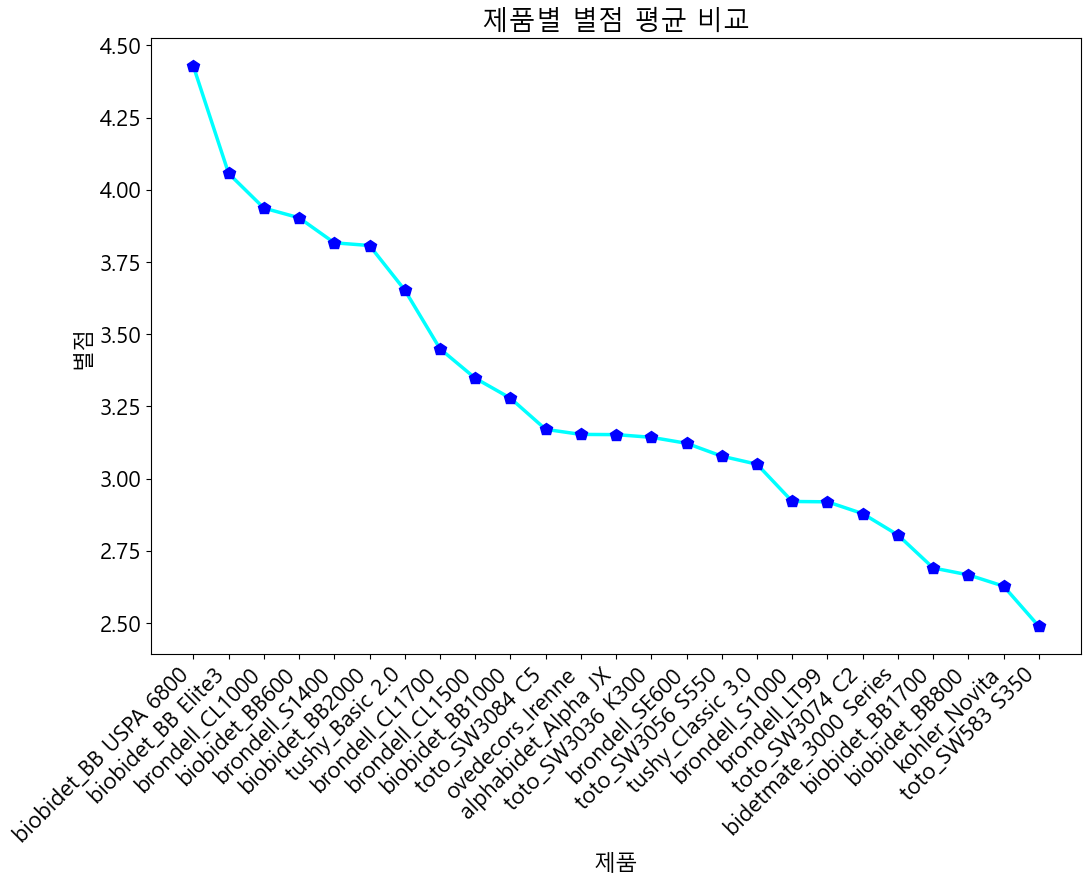

In [645]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(pr1['브랜드명_제품명'], pr1['mean'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('제품별 별점 평균 비교')  # 그래프 제목 설정
plt.xlabel('제품')  # x축 레이블 설정
plt.ylabel('별점')  # y축 레이블 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [646]:
pr2 = pr.groupby(['연도', '제품명'])['별점'].mean().reset_index()[['연도', '제품명', '별점']]
pr2

,연도,제품명,별점
0,2017,Advanced Clean 1.0 SpaLet,2.229976
1,2017,Advanced Clean 2.0 SpaLet,2.331936
2,2017,Alpha JX,3.261153
3,2017,BB A8,2.467975
4,2017,BB Elite3,4.056191
...,...,...,...
184,2022,SW3084 C5,3.045474
185,2022,SW583 S350,2.661738
186,2022,VB-4000SE,2.277712
187,2022,VB-6000SE,1.655228


In [647]:
product_list = pr1['제품명'].values.tolist()

pr2 = pr2[pr2['제품명'].isin(product_list)].sort_values(by='별점', ascending=False)
pr2

,연도,제품명,별점
26,2018,BB USPA 6800,4.489208
52,2019,BB USPA 6800,4.467314
82,2020,BB USPA 6800,4.426951
114,2021,BB USPA 6800,4.365456
156,2022,BB USPA 6800,4.358297
...,...,...,...
107,2020,SW583 S350,2.459384
31,2018,BB800,2.441444
143,2021,SW583 S350,2.397121
20,2017,SW583 S350,2.365990


In [648]:
df_pivot = pr2.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot

제품명,3000 Series,Alpha JX,BB Elite3,BB USPA 6800,BB1000,BB1700,BB2000,BB600,BB800,Basic 2.0,...,LT99,Novita,S1000,S1400,SE600,SW3036 K300,SW3056 S550,SW3074 C2,SW3084 C5,SW583 S350
연도,,,,,,,,,,,,,,,,,,,,,
2017,2.898140,3.261153,4.056191,4.302447,3.325114,2.767012,3.937067,3.970409,2.714810,3.906540,...,3.165156,3.101344,2.825269,4.012689,3.565276,3.096559,3.025852,2.968717,3.371196,2.365990
2018,2.898140,3.172652,4.059408,4.489208,3.271810,2.767012,3.943964,3.942238,2.441444,3.906540,...,3.165156,3.101344,2.915863,3.727132,3.278315,3.096559,3.025852,2.968717,3.371196,2.587801
2019,2.898140,3.177772,4.180294,4.467314,2.972834,2.720895,3.823228,3.986432,2.542202,3.760593,...,3.165156,2.544692,2.891077,3.840644,3.237044,3.191136,3.244918,2.968717,3.371196,2.688625
2020,2.898140,3.234797,4.030508,4.426951,3.429446,2.637492,3.788108,4.036804,2.734417,3.642937,...,3.165156,2.544692,2.995923,3.908017,3.113095,3.178355,3.129056,2.968717,3.371196,2.459384
2021,2.844551,3.144684,3.921005,4.365456,3.310921,2.701906,3.793768,3.719025,2.658917,3.628518,...,2.963051,2.576501,2.872041,3.787124,2.914226,3.176335,3.005612,2.968717,3.371196,2.397121
2022,2.598332,3.088044,4.047622,4.358297,3.111526,2.656331,3.725180,3.382749,2.790222,3.540142,...,2.711352,2.601381,3.033846,3.493440,2.607108,3.013984,2.939506,2.783398,3.045474,2.661738


#### TOP20 별점 추이

<Figure size 2000x1600 with 0 Axes>

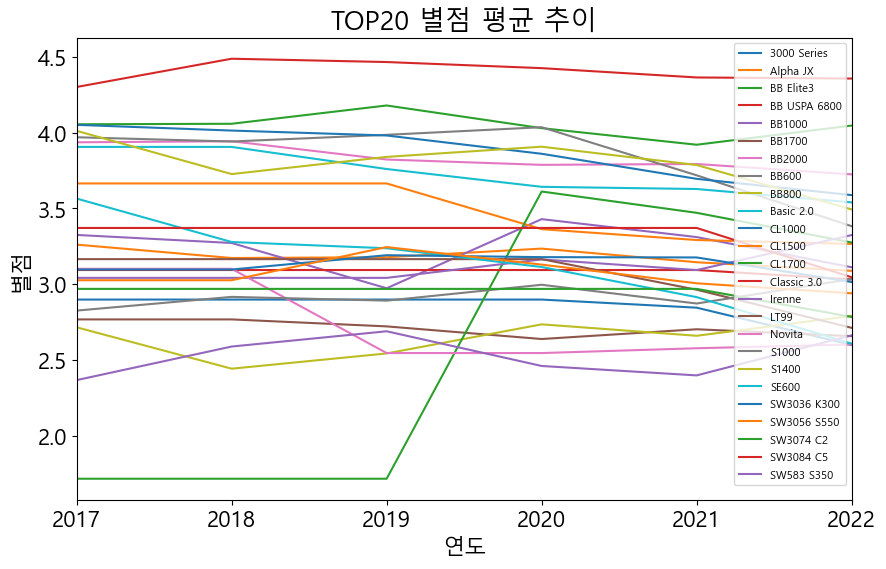

In [649]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = pr2.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('TOP20 별점 평균 추이')
ax.set_xlabel('연도')
ax.set_ylabel('별점')
ax.legend(fontsize=8)  # 범례 크기 조정
plt.show()

### 코스트코 제외

In [650]:
pr3 = pr[pr['채널명']!='costco']
pr3

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [651]:
pr3 = pr3.groupby(['회사명', '제품명'])['별점'].agg(['mean', 'sum']).reset_index().sort_values(by='mean', ascending=False)
pr3

,회사명,제품명,mean,sum
11,biobidet,BB600,3.903114,8672.718382
18,brondell,S1400,3.816468,7846.658940
10,biobidet,BB2000,3.807183,6460.789634
31,tushy,Basic 2.0,3.652915,5402.661391
8,biobidet,BB1000,3.278646,1331.130199
29,toto,SW3084 C5,3.170752,1442.692238
4,alphabidet,Alpha JX,3.152498,1286.219258
25,toto,SW3036 K300,3.143157,1294.980874
19,brondell,SE600,3.122506,1252.124968
27,toto,SW3056 S550,3.077865,1101.875499


In [652]:
pr3['브랜드명_제품명'] = pr3['회사명'] + '_' + pr3['제품명']
pr3

,회사명,제품명,mean,sum,브랜드명_제품명
11,biobidet,BB600,3.903114,8672.718382,biobidet_BB600
18,brondell,S1400,3.816468,7846.658940,brondell_S1400
10,biobidet,BB2000,3.807183,6460.789634,biobidet_BB2000
31,tushy,Basic 2.0,3.652915,5402.661391,tushy_Basic 2.0
8,biobidet,BB1000,3.278646,1331.130199,biobidet_BB1000
29,toto,SW3084 C5,3.170752,1442.692238,toto_SW3084 C5
4,alphabidet,Alpha JX,3.152498,1286.219258,alphabidet_Alpha JX
25,toto,SW3036 K300,3.143157,1294.980874,toto_SW3036 K300
19,brondell,SE600,3.122506,1252.124968,brondell_SE600
27,toto,SW3056 S550,3.077865,1101.875499,toto_SW3056 S550


In [653]:
pr3 = pr3[:25]
pr3

,회사명,제품명,mean,sum,브랜드명_제품명
11,biobidet,BB600,3.903114,8672.718382,biobidet_BB600
18,brondell,S1400,3.816468,7846.658940,brondell_S1400
10,biobidet,BB2000,3.807183,6460.789634,biobidet_BB2000
31,tushy,Basic 2.0,3.652915,5402.661391,tushy_Basic 2.0
8,biobidet,BB1000,3.278646,1331.130199,biobidet_BB1000
29,toto,SW3084 C5,3.170752,1442.692238,toto_SW3084 C5
4,alphabidet,Alpha JX,3.152498,1286.219258,alphabidet_Alpha JX
25,toto,SW3036 K300,3.143157,1294.980874,toto_SW3036 K300
19,brondell,SE600,3.122506,1252.124968,brondell_SE600
27,toto,SW3056 S550,3.077865,1101.875499,toto_SW3056 S550


In [654]:
pr3['제품명'].values

array(['BB600', 'S1400', 'BB2000', 'Basic 2.0', 'BB1000', 'SW3084 C5',
       'Alpha JX', 'SW3036 K300', 'SE600', 'SW3056 S550', 'Classic 3.0',
       'S1000', 'LT99', 'SW3074 C2', 'Novita', '3000 Series', 'BB1700',
       'BB800', 'SW583 S350', 'BB A8', 'VB-6100SR', 'C3-230', 'C3-155',
       'DIB', 'Advanced Clean 2.0 SpaLet'], dtype=object)

#### TOP 20

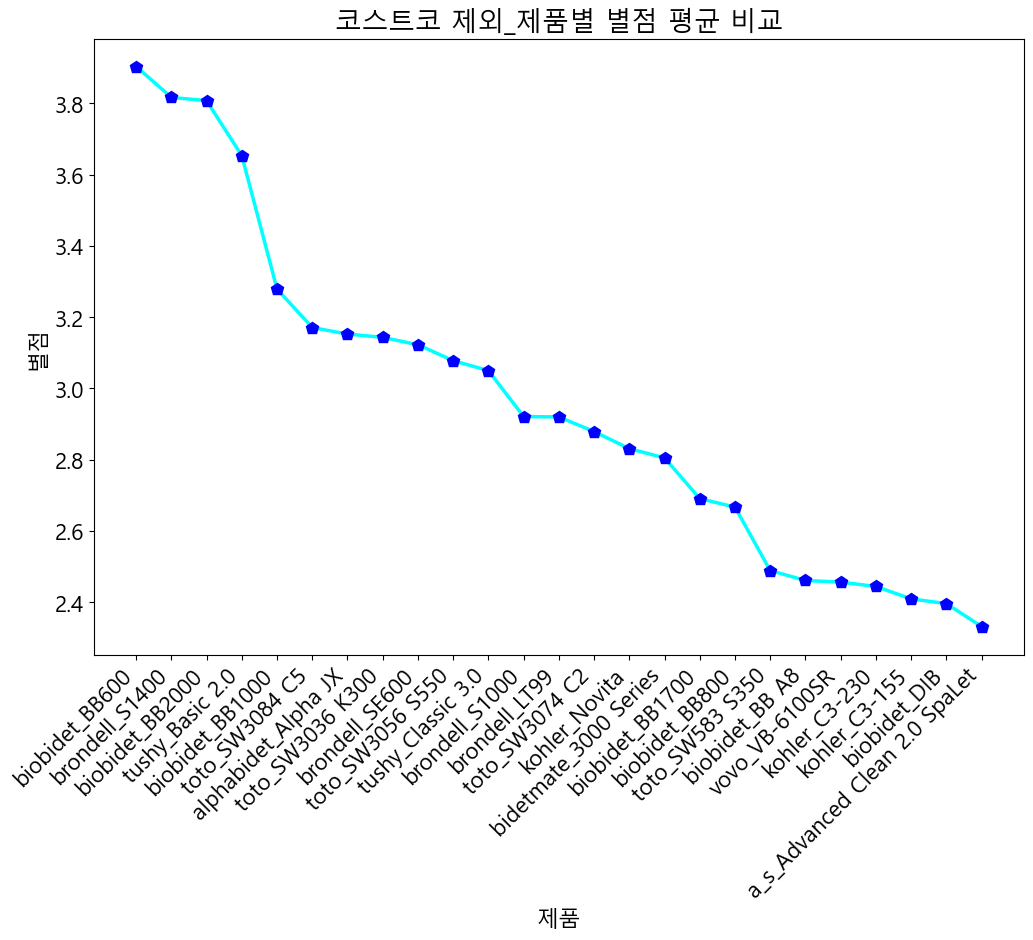

In [655]:
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(pr3['브랜드명_제품명'], pr3['mean'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('코스트코 제외_제품별 별점 평균 비교')  # 그래프 제목 설정
plt.xlabel('제품')  # x축 레이블 설정
plt.ylabel('별점')  # y축 레이블 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [656]:
pr4 = pr[pr['채널명']!='costco']
pr4

,회사명,제품명,작성일,별점,채널명,연도,분기
0,brondell,SE600,2017-09-20,3.565276,hd,2017,2017Q3
1,brondell,SE600,2018-01-03,2.139166,hd,2018,2018Q1
2,brondell,SE600,2018-01-03,3.565276,hd,2018,2018Q1
3,brondell,SE600,2018-01-24,3.565276,hd,2018,2018Q1
4,brondell,SE600,2018-02-02,3.565276,hd,2018,2018Q1
...,...,...,...,...,...,...,...
31390,brondell,CL510,2018-12-02,2.305681,lowes,2018,2018Q4
31391,brondell,CL510,2020-04-02,2.305681,lowes,2020,2020Q2
31392,brondell,CL510,2021-01-04,2.305681,lowes,2021,2021Q1
31393,brondell,CL510,2019-10-30,2.305681,lowes,2019,2019Q4


In [657]:
pr4 = pr4.groupby(['연도', '제품명'])['별점'].mean().reset_index()[['연도', '제품명', '별점']]
pr4

,연도,제품명,별점
0,2017,Advanced Clean 1.0 SpaLet,2.229976
1,2017,Advanced Clean 2.0 SpaLet,2.331936
2,2017,Alpha JX,3.261153
3,2017,BB A8,2.467975
4,2017,BB1000,3.325114
...,...,...,...
154,2022,SW3084 C5,3.045474
155,2022,SW583 S350,2.661738
156,2022,VB-4000SE,2.277712
157,2022,VB-6000SE,1.655228


In [658]:
product_list = pr3['제품명'].values

pr4 = pr4[pr4['제품명'].isin(product_list)].sort_values(by='별점', ascending=False)
pr4

,연도,제품명,별점
72,2020,BB600,4.036804
15,2017,S1400,4.012689
48,2019,BB600,3.986432
7,2017,BB600,3.970409
24,2018,BB2000,3.943964
...,...,...,...
126,2022,Advanced Clean 2.0 SpaLet,2.225939
28,2018,C3-155,2.212447
143,2022,DIB,2.166835
139,2022,C3-230,2.125936


In [659]:
df_pivot = pr4.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot.fillna(method='ffill', inplace=True)
df_pivot

제품명,3000 Series,Advanced Clean 2.0 SpaLet,Alpha JX,BB A8,BB1000,BB1700,BB2000,BB600,BB800,Basic 2.0,...,Novita,S1000,S1400,SE600,SW3036 K300,SW3056 S550,SW3074 C2,SW3084 C5,SW583 S350,VB-6100SR
연도,,,,,,,,,,,,,,,,,,,,,
2017,2.898140,2.331936,3.261153,2.467975,3.325114,2.767012,3.937067,3.970409,2.714810,3.906540,...,3.101344,2.825269,4.012689,3.565276,3.096559,3.025852,2.968717,3.371196,2.365990,2.426351
2018,2.898140,2.473265,3.172652,2.597868,3.271810,2.767012,3.943964,3.942238,2.441444,3.906540,...,3.101344,2.915863,3.727132,3.278315,3.096559,3.025852,2.968717,3.371196,2.587801,2.426351
2019,2.898140,2.473265,3.177772,2.540138,2.972834,2.720895,3.823228,3.986432,2.542202,3.760593,...,2.544692,2.891077,3.840644,3.237044,3.191136,3.244918,2.968717,3.371196,2.688625,2.426351
2020,2.898140,2.473265,3.234797,2.292237,3.429446,2.637492,3.788108,4.036804,2.734417,3.642937,...,2.544692,2.995923,3.908017,3.113095,3.178355,3.129056,2.968717,3.371196,2.459384,2.426351
2021,2.844551,1.978612,3.144684,2.482407,3.310921,2.701906,3.793768,3.719025,2.658917,3.628518,...,2.783257,2.872041,3.787124,2.914226,3.176335,3.005612,2.968717,3.371196,2.397121,2.426351
2022,2.598332,2.225939,3.088044,2.597868,3.111526,2.656331,3.725180,3.382749,2.790222,3.540142,...,2.332635,3.033846,3.493440,2.607108,3.013984,2.939506,2.783398,3.045474,2.661738,2.562826


#### TOP20 별점 추이

<Figure size 2000x1600 with 0 Axes>

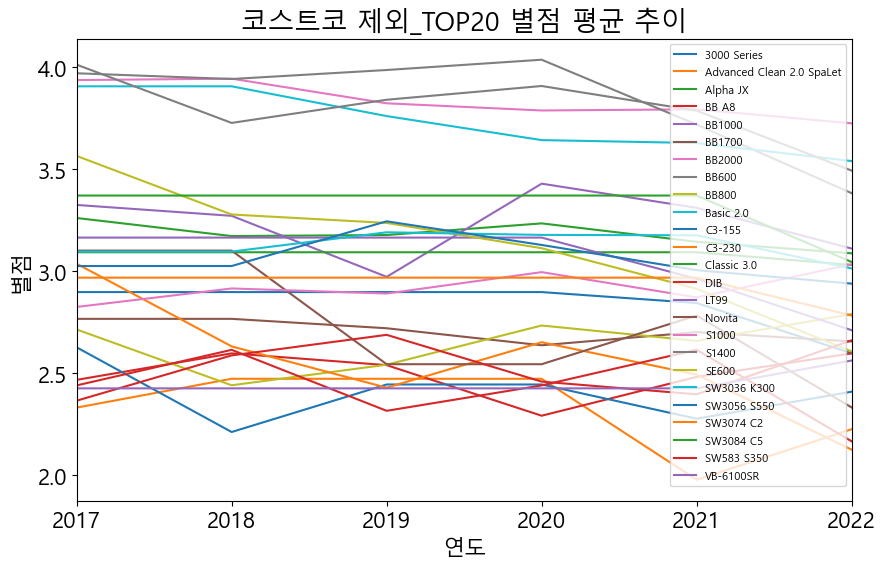

In [660]:
plt.figure(figsize=(20,16))  # 그래프 크기 설정
# pivot_table을 사용하여 데이터프레임 변형
df_pivot = pr4.pivot_table(values='별점', index='연도', columns='제품명')
df_pivot.fillna(method='backfill', inplace=True)
df_pivot.fillna(method='ffill', inplace=True)
df_pivot

# plot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(ax=ax)

# 그래프 꾸미기
ax.set_title('코스트코 제외_TOP20 별점 평균 추이')
ax.set_xlabel('연도')
ax.set_ylabel('별점')
ax.legend(fontsize=8)  # 범례 크기 조정
plt.show()

## 비교 정리

In [661]:
p1 = pr1['제품명'].values.tolist()
p2 = pr3['제품명'].values.tolist()
df_pr1 = pd.DataFrame(p1)
df_pr2 = pd.DataFrame(p2)
df_pr = pd.merge(df_pr1, df_pr2, how='outer', left_index=True, right_index=True)
df_pr

,0_x,0_y
0,BB USPA 6800,BB600
1,BB Elite3,S1400
2,CL1000,BB2000
3,BB600,Basic 2.0
4,S1400,BB1000
5,BB2000,SW3084 C5
6,Basic 2.0,Alpha JX
7,CL1700,SW3036 K300
8,CL1500,SE600
9,BB1000,SW3056 S550


In [662]:
matched = list(set(p1) and set(p2))
matched

['Alpha JX',
 'SW3056 S550',
 'SW3084 C5',
 'BB A8',
 'BB1000',
 'SE600',
 'SW3074 C2',
 'BB800',
 'SW3036 K300',
 'LT99',
 'SW583 S350',
 'BB2000',
 'Advanced Clean 2.0 SpaLet',
 'BB1700',
 'C3-155',
 'S1400',
 'Basic 2.0',
 'C3-230',
 'Classic 3.0',
 'DIB',
 'VB-6100SR',
 'Novita',
 'BB600',
 '3000 Series',
 'S1000']

In [663]:
unmatched = list(set(p1) ^ set(p2))
unmatched

['CL1700',
 'BB A8',
 'Advanced Clean 2.0 SpaLet',
 'DIB',
 'VB-6100SR',
 'CL1500',
 'BB Elite3',
 'C3-155',
 'CL1000',
 'Irenne',
 'BB USPA 6800',
 'C3-230']